<a href="https://colab.research.google.com/github/Navjotkhatri/CARDIOVASCULAR-RISK-PREDICTION/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name-Cardiovascular Risk Prediction**


##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
## Data Maipulation Libraries
import numpy as np
import pandas as pd

## Data Visualisation Libraray
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import seaborn as sns 

## Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

## Warnings 
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/module-4 ML/Cardiovascular risk prediction/data_cardiovascular_risk.csv')
     

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

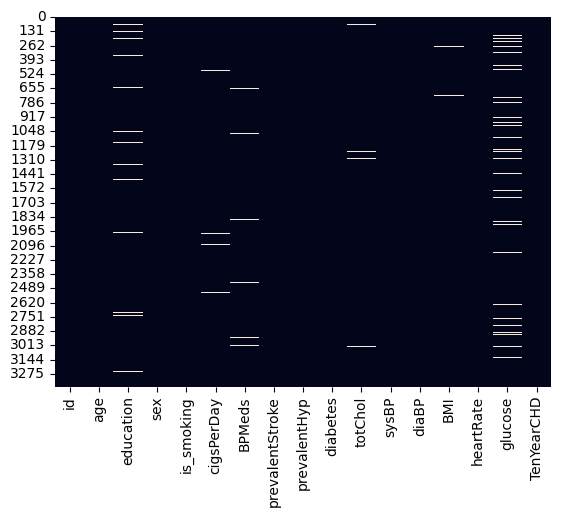

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)

### What did you know about your dataset?


* Cardiovascular risk prediction datasets typically include data on a range of risk factors that may affect an individual's risk of developing cardiovascular disease, such as age, gender, blood pressure, cholesterol levels, smoking status, and history of cardiovascular disease. Other factors such as body mass index, diabetes also included. Also this dataset have some missing values. Majorly in glucose and education.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description 

**Demographic:**

* Age: Age of the patient.

* Sex: male or female("M" or "F")

**Behavioral:**

* is_smoking: whether or not the patient is a current smoker ("YES" or "NO").

* CigsPerDay: the number of cigarettes that the person smoked on average in one day.(countinous type feature because a person can smoke 'n' times a day)

**Medical(history):**

* BPMeds: whether or not the patient was on blood pressure medication.

* Prevalent Stroke: whether or not the patient had previously had a stroke.

* Prevalent Hyp: whether or not the patient was hypertensive.

* Diabetes: whether or not the patient had diabetes.

**Medical(current):**

* Tot Chol: total cholesterol level.

* Sys BP: systolic blood pressure.

* Dia BP: diastolic blood pressure.

* BMI: Body Mass Index.

* Heart Rate: heart rate.

* Glucose: glucose level.

**Target feature(class of risk):**

* TenYearCHD: 10-year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Separating the categorical and continous variable and storing them
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <5:
    categorical_variable.append(i)
  elif df[i].nunique() >= 5:
    continous_variable.append(i)

print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [15]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64

In [16]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

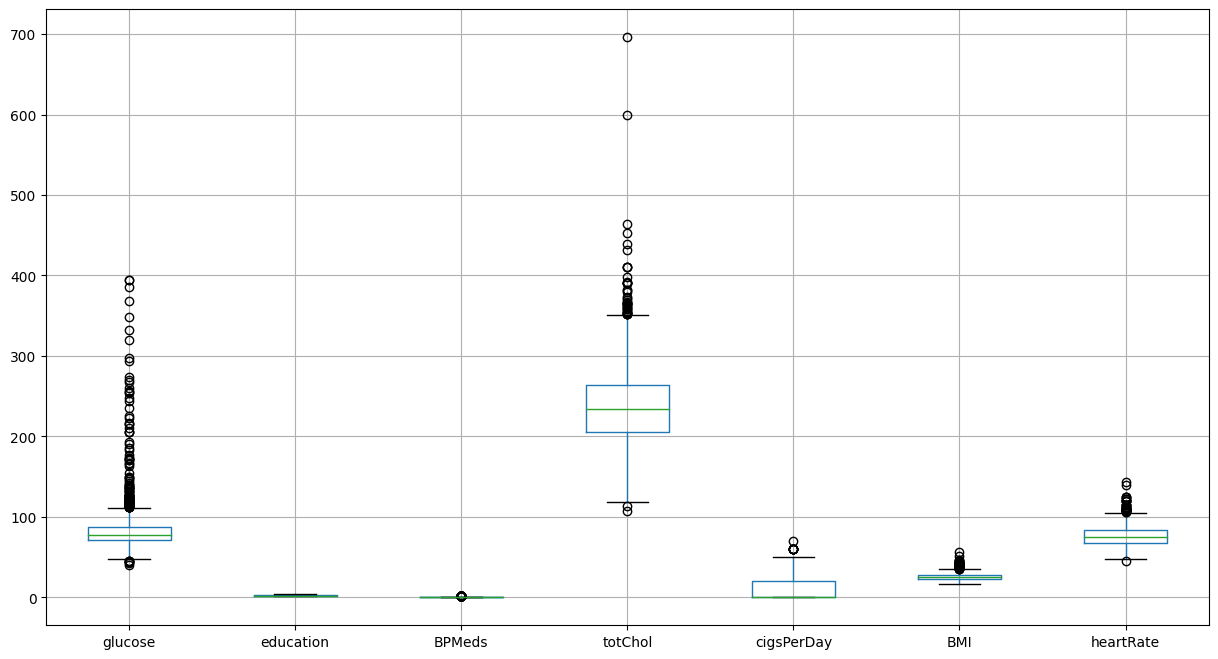

In [17]:
# storing the column that contains null values  
null_column_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']
# plotting box plot
plt.figure(figsize=(15,8))
df[null_column_list].boxplot()

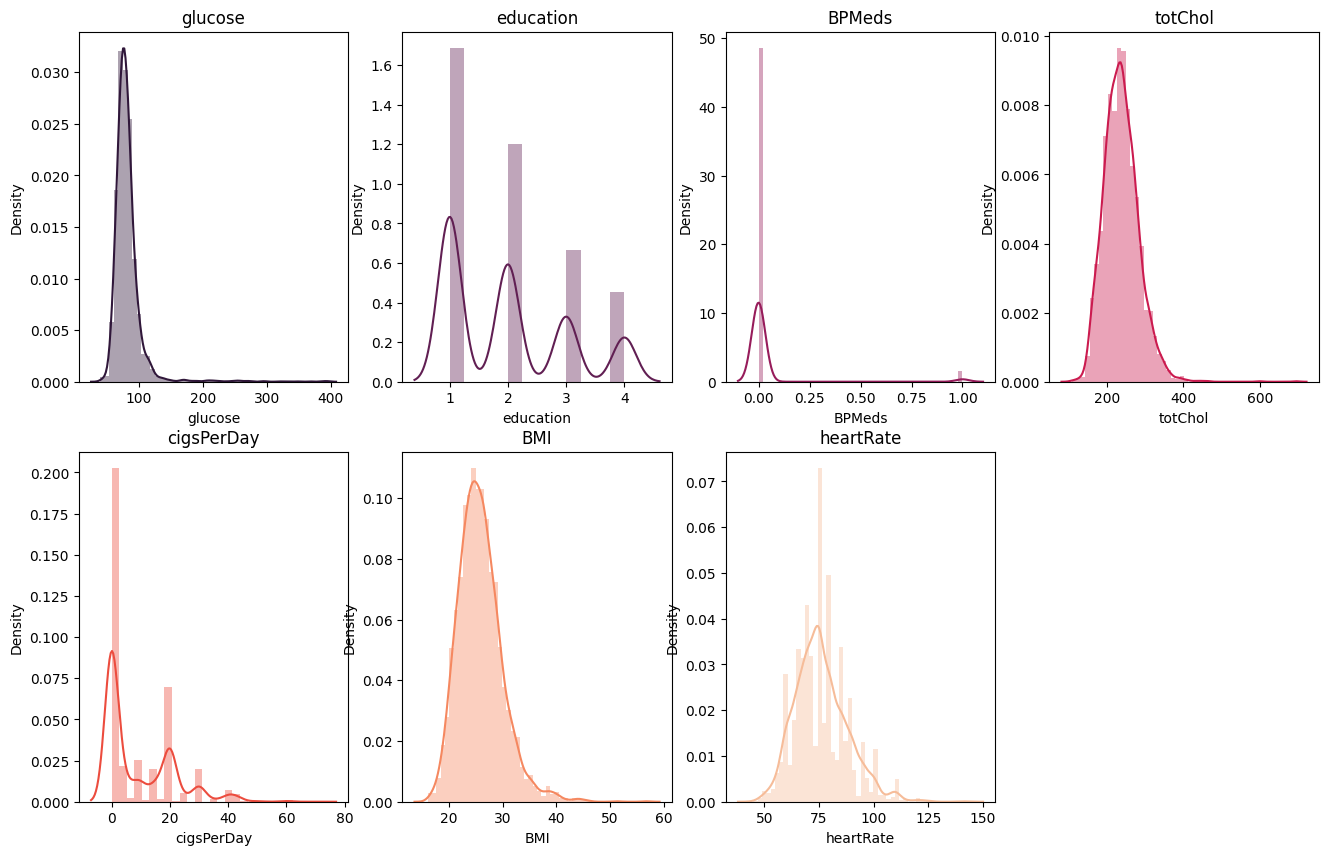

In [18]:
# Iterate over the null column list and plot each column's distribution
colors = sns.color_palette("rocket", len(null_column_list))


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))


axes = axes.flatten()


for i, column in enumerate(null_column_list):
    ax = axes[i]

    sns.distplot(df[column], ax=ax, color=colors[i])
    ax.set_title(column)

for j in range(len(null_column_list), len(axes)):
    axes[j].remove()

plt.show()

* It is a well-known fact that the appropriate measure of central tendency depends on the nature of the data. Typically, the mean is used for data that follows a normal distribution and does not contain any outliers. On the other hand, when dealing with numerical, continuous data that contains extreme values or outliers, the median is the preferred measure of central tendency. For categorical data, the mode is used.

* Based on the outliers and distribution of the data, we have determined that the following measures of central tendency are appropriate for imputing the null values in the following columns.

* "education" , "BPMeds" -> mode: As "education" and "BPMeds" is a categorical variable, the mode is the most appropriate measure of central tendency. The mode represents the most frequently occurring value in the distribution and can provide insight into the most common level of education in the dataset.

* "glucose","totChol", "cigsPerDay", "BMI", "heartRate" -> median: Since this are numerical, continuous variable that contain extreme values or outliers, we have chosen the median as the appropriate measure of central tendency. The median is less sensitive to extreme values than the mean and provides a representative value for the central tendency of the distribution.

In [19]:
# Imputing missing values with median or mode
df.fillna({'glucose': df['glucose'].median(),
           'education': df['education'].mode()[0],
           'BPMeds': df['BPMeds'].mode()[0],
           'totChol': df['totChol'].median(),
           'cigsPerDay': df['cigsPerDay'].median(),
           'BMI': df['BMI'].median(),
           'heartRate': df['heartRate'].median()}, inplace=True)

### What all manipulations have you done and insights you found?

* performed imputation of missing values using a combination of median and mode imputation. Specifically, for the glucose and totChol columns, cigsPerDay, BMI, and heartRate the missing values are replaced with the median of the non-missing values. For the education, BPMeds columns, the missing values are replaced with the mode (most frequently occurring value) of the non-missing values.

* Median and mode imputation are commonly used imputation techniques for handling missing values. Median imputation is often used for continuous variables, as it is less sensitive to outliers compared to mean imputation. Mode imputation is often used for categorical variables or discrete variables with a small number of possible values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

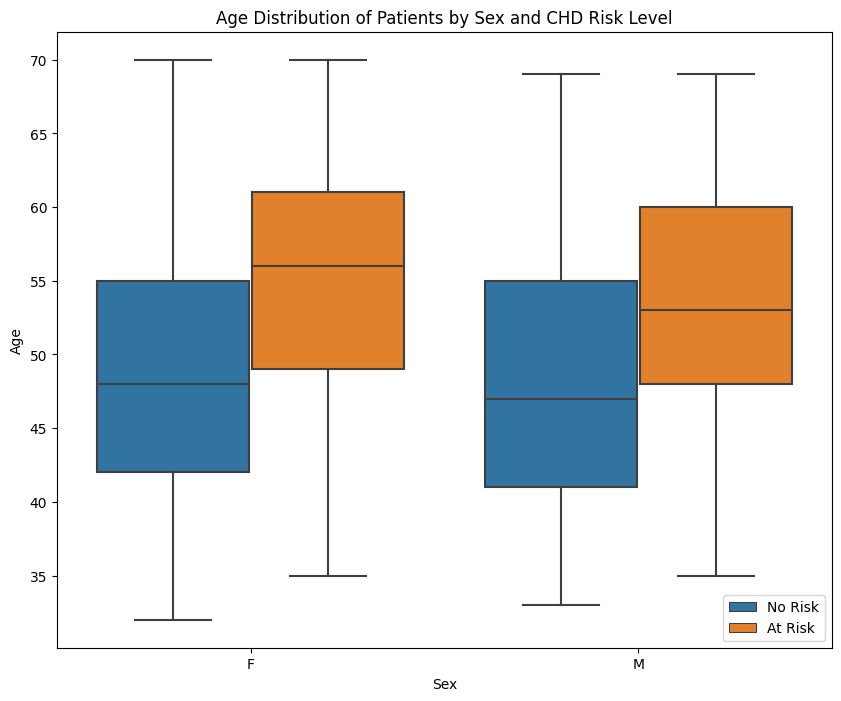

In [20]:
# Chart - 1 visualization code
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="sex", y="age", hue="TenYearCHD", data= df, ax=ax)
ax.set_title("Age Distribution of Patients by Sex and CHD Risk Level")
ax.set_xlabel("Sex")
ax.set_ylabel("Age")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Risk", "At Risk"], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

* This chart is a boxplot that visualizes the age distribution of patients by sex and CHD (coronary heart disease) risk level. It was likely chosen to gain insights into how age, sex, and CHD risk level may be related in this dataset.

##### 2. What is/are the insight(s) found from the chart?

* There is a noticeable difference in the age distribution of patients who are at risk for CHD compared to those who are not at risk. Patients at risk for CHD tend to be older than those who are not at risk, regardless of sex.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this chart may be useful for businesses that provide healthcare services or products. For example, companies that produce medical devices or medications for CHD may want to consider targeting older patients or patients who are at higher risk for CHD. However, it is important to note that this chart alone may not provide enough information to make business decisions. Further analysis would be needed to fully understand the relationship between age, sex, CHD risk level, and other relevant factors. There are no insights from this chart that suggest negative growth.

#### Chart - 2

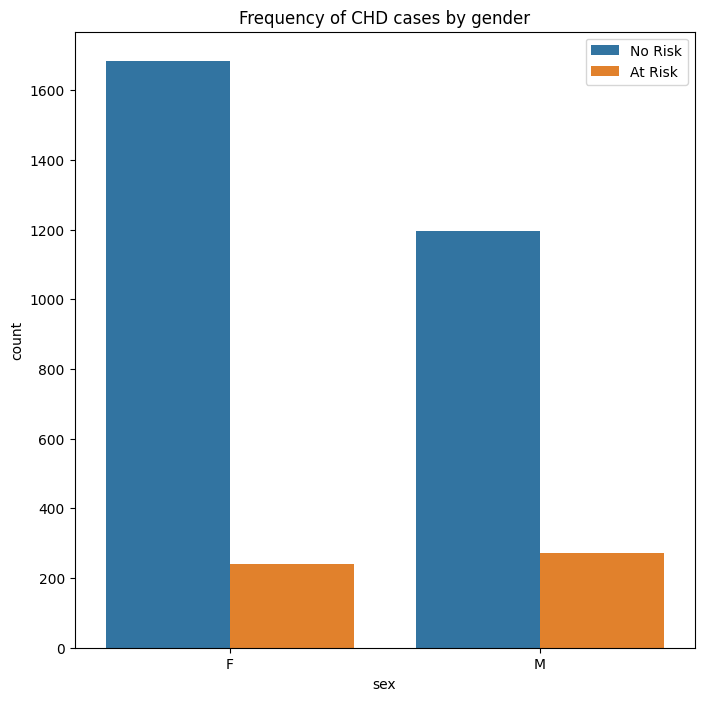

In [21]:
# Chart - 2 visualization code

plt.figure(figsize=(8,8))
sns.countplot(x='sex', hue='TenYearCHD', data= df)
plt.title('Frequency of CHD cases by gender')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart is a countplot that visualizes the frequency of CHD (coronary heart disease) cases by gender in the dataset. It was likely chosen to investigate whether gender affects the risk of CHD in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that there are more cases of CHD among men than women in the dataset. However, this difference is not drastic, as the number of cases of CHD is relatively similar between men and women. Additionally, the chart shows that there are more cases of no risk for CHD among women compared to men.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this chart may be useful for businesses that provide healthcare services or products. For example, companies that produce medical devices or medications for CHD may want to consider targeting both men and women, but may want to focus more on men, who appear to be at higher risk for CHD in this dataset.

#### Chart - 3

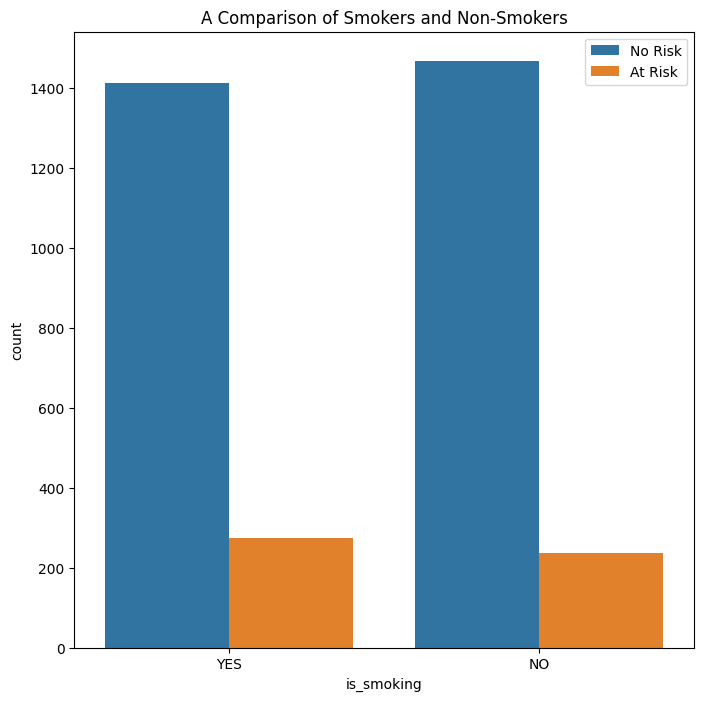

In [22]:
# Chart - 3 visualization code
plt.figure(figsize=(8,8))
sns.countplot(x='is_smoking', hue='TenYearCHD', data= df)
plt.title('A Comparison of Smokers and Non-Smokers')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart is a countplot that visualizes the frequency of CHD (coronary heart disease) cases among smokers and non-smokers. It was likely chosen to gain insights into how smoking may be related to the risk of CHD in this dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients who smoke appear to be at higher risk for CHD than those who do not smoke in this dataset. Specifically, a higher proportion of patients who smoke are at risk for CHD compared to those who do not smoke. These findings suggest that smoking may be a factor in determining the risk of CHD in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* There are no insights from this chart that suggest negative growth. This chart only shows the frequency of CHD cases among smokers and non-smokers, and does not provide information on other factors that may be relevant for businesses, such as age or other lifestyle factors. Additionally, the dataset may not be representative of the population as a whole, which could limit the generalizability of the insights gained from this chart.

#### Chart - 4

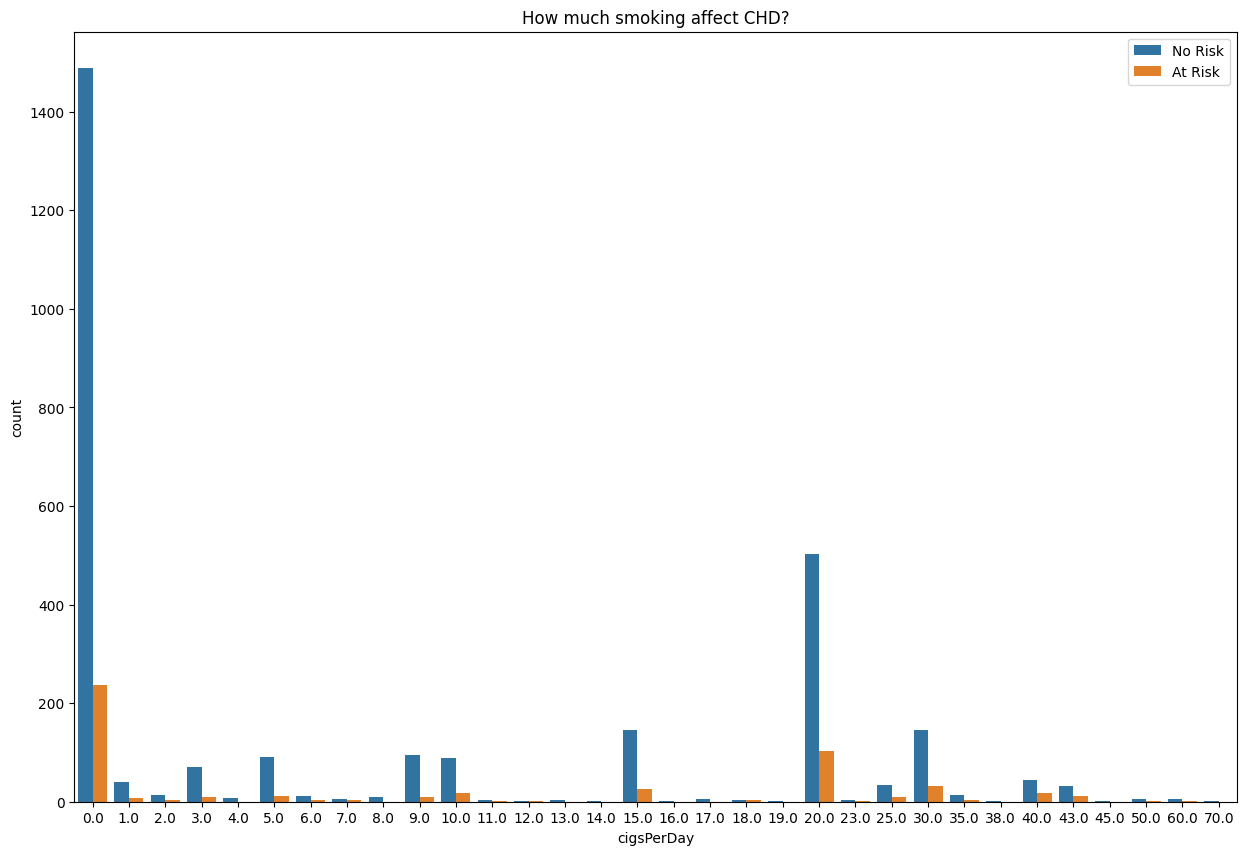

In [23]:
# Chart - 4 visualization code
plt.figure(figsize=(15,10))
sns.countplot(x= df['cigsPerDay'],hue= df['TenYearCHD'])
plt.title('How much smoking affect CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart is a countplot that visualizes the relationship between the number of cigarettes smoked per day and the risk of CHD in this dataset. It was likely chosen to gain insights into how smoking intensity may be related to CHD risk.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients who smoke more cigarettes per day or do not smoke appear to be at higher risk for CHD than those who smoke fewer cigarettes per day. Specifically, a higher proportion of patients who smoke 20 or more cigarettes per day are at risk for CHD compared to those who smoke fewer cigarettes per day. These findings suggest that smoking intensity may be a factor in determining the risk of CHD in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Companies that produce smoking cessation aids or medications for CHD may want to consider targeting heavy smokers, as they appear to be at higher risk for CHD in this dataset.

#### Chart - 5

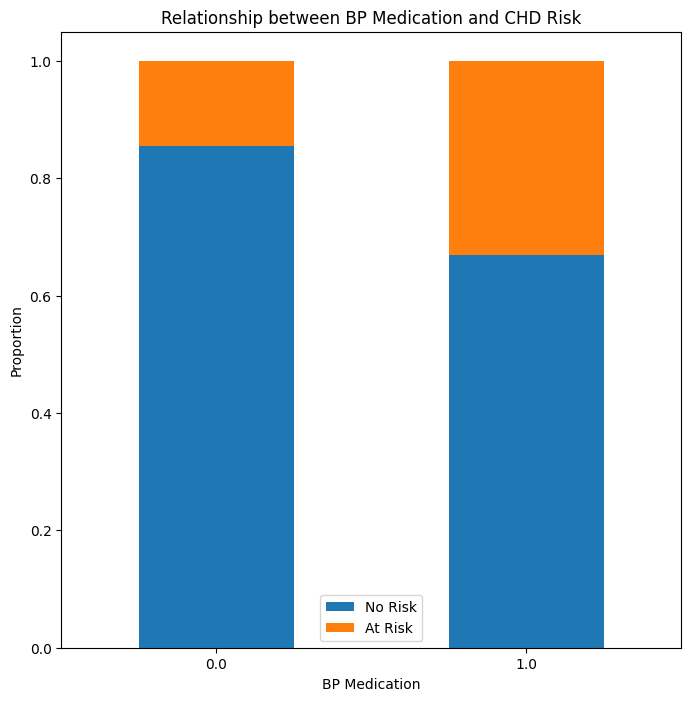

In [24]:
# Chart - 5 visualization code
ct = pd.crosstab(df['BPMeds'], df['TenYearCHD'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(8, 8))
plt.title('Relationship between BP Medication and CHD Risk')
plt.xlabel('BP Medication')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart is a stacked bar chart that shows the relationship between whether a patient takes medication for blood pressure and their risk of CHD. It was likely chosen to investigate whether BP medication use is associated with CHD risk in this dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients who take medication for blood pressure appear to be at higher risk for CHD compared to those who do not take medication for blood pressure. Specifically, the proportion of patients who are at risk for CHD is not similar for those who take medication for blood pressure and those who do not. These findings suggest that BP medication use may be a significant factor in determining CHD risk in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Companies that produce BP medication or other treatments for hypertension may want to consider targeting patients with high blood pressure who are at risk for CHD, regardless of whether they are currently taking medication for blood pressure. This approach may help identify patients who would benefit from more aggressive treatment to reduce their risk of CHD.

#### Chart - 6

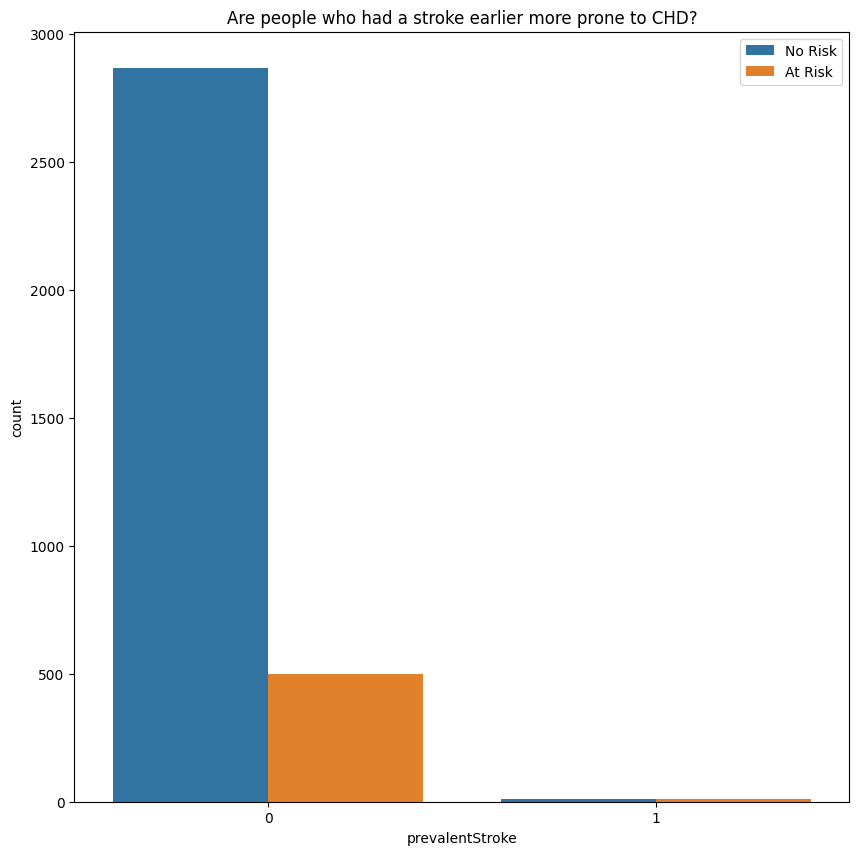

In [25]:
# Chart - 6 visualization code
plt.figure(figsize=(10,10))
sns.countplot(x=df['prevalentStroke'], hue=df['TenYearCHD'])
plt.title('Are people who had a stroke earlier more prone to CHD?')
plt.legend(['No Risk', 'At Risk'], loc='best')
plt.show()
     

##### 1. Why did you pick the specific chart?

* This chart is a countplot that compares the CHD risk level of patients who have had a prevalent stroke versus those who have not. It was likely chosen to investigate whether there is an association between having a stroke and being more susceptible to CHD.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients who have had a prevalent stroke appear to be at higher risk for CHD compared to those who have not. Specifically, the proportion of patients who are at risk for CHD is higher among those who have had a stroke compared to those who have not. These findings suggest that having a stroke may be a risk factor for developing CHD in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this chart may be useful for businesses that provide healthcare services or products related to stroke or CHD. For example, companies that produce medications or treatments for stroke or CHD may want to consider targeting patients who have had a stroke as a high-risk population for CHD.

* Healthcare providers may want to screen patients who have had a stroke for CHD risk and provide appropriate preventative measures or treatments.

#### Chart - 7

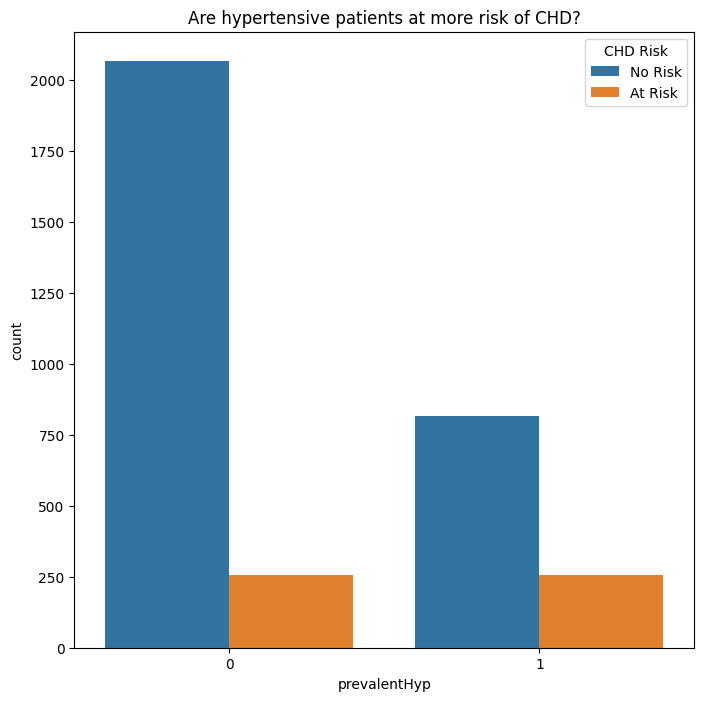

In [26]:
# Chart - 7 visualization code
plt.figure(figsize=(8,8))
sns.countplot(x=df['prevalentHyp'], hue=df['TenYearCHD'])
plt.title('Are hypertensive patients at more risk of CHD?')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart was picked to visualize the relationship between prevalent hypertension and the risk of developing coronary heart disease in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients with prevalent hypertension are more likely to be at risk of developing coronary heart disease compared to those without hypertension.

* Specifically, the proportion of patients who are at risk for CHD is similar for those who with prevalent hypertension and those who do not.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the gained insight can help healthcare businesses and professionals identify high-risk patients with hypertension who need further evaluation, monitoring, and management to prevent the development or progression of coronary heart disease.

* There are no insights that lead to negative growth in this chart.



#### Chart - 8

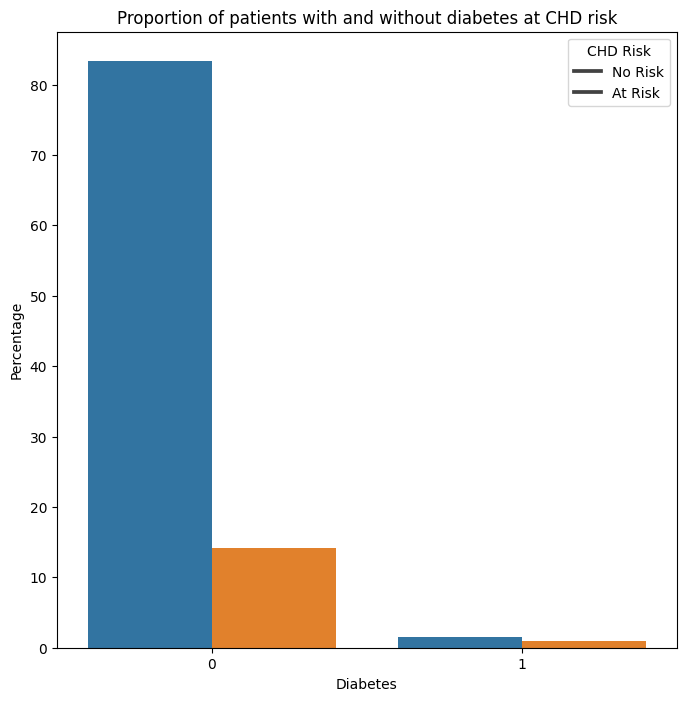

In [27]:
# Chart - 8 visualization code
plt.figure(figsize=(8,8))
sns.barplot(x=df['diabetes'], y=df['TenYearCHD'], hue=df['TenYearCHD'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Proportion of patients with and without diabetes at CHD risk')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart was picked to visualize the proportion of patients with and without diabetes who are at risk of developing coronary heart disease in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that patients with diabetes are more likely to be at risk of developing coronary heart disease compared to those without diabetes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the gained insight can help healthcare businesses and professionals identify high-risk patients with diabetes who need further evaluation, monitoring, and management to prevent the development or progression of coronary heart disease.

#### Chart - 9

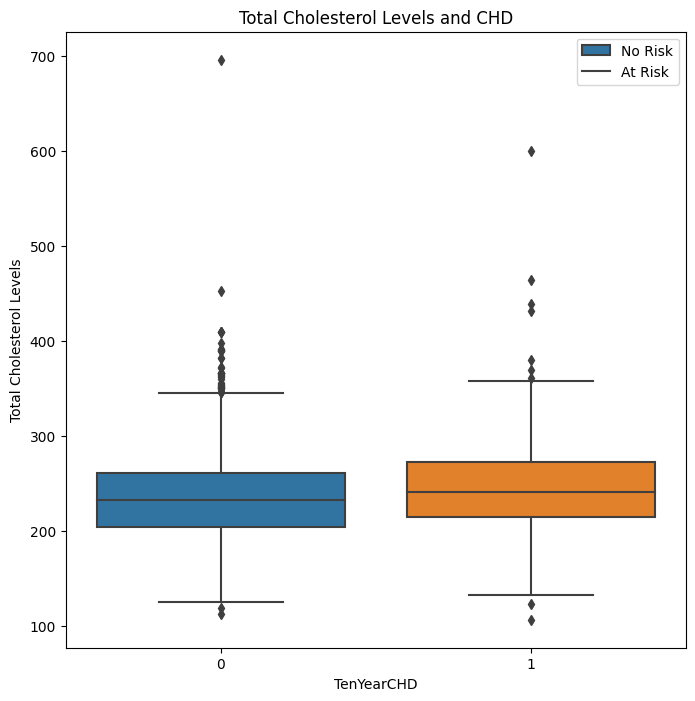

In [28]:
# Chart - 9 visualization code
plt.figure(figsize=(8,8))
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol Levels and CHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Total Cholesterol Levels')
plt.legend(['No Risk', 'At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

* The specific box plot was chosen to answer the question of whether there is a correlation between total cholesterol levels and the risk of developing coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

* The box plot shows that patients who are at risk of developing coronary heart disease have slightly higher total cholesterol levels on average than those who are not at risk. There is some overlap in the range of cholesterol levels between the two groups

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insight can help healthcare providers to consider the impact of total cholesterol levels on the risk of developing coronary heart disease in their patients. By identifying patients with high cholesterol levels, appropriate interventions can be implemented to lower their risk of developing the disease. This can have a positive impact on patient health outcomes and lead to cost savings for healthcare providers in the long run.

#### Chart - 10

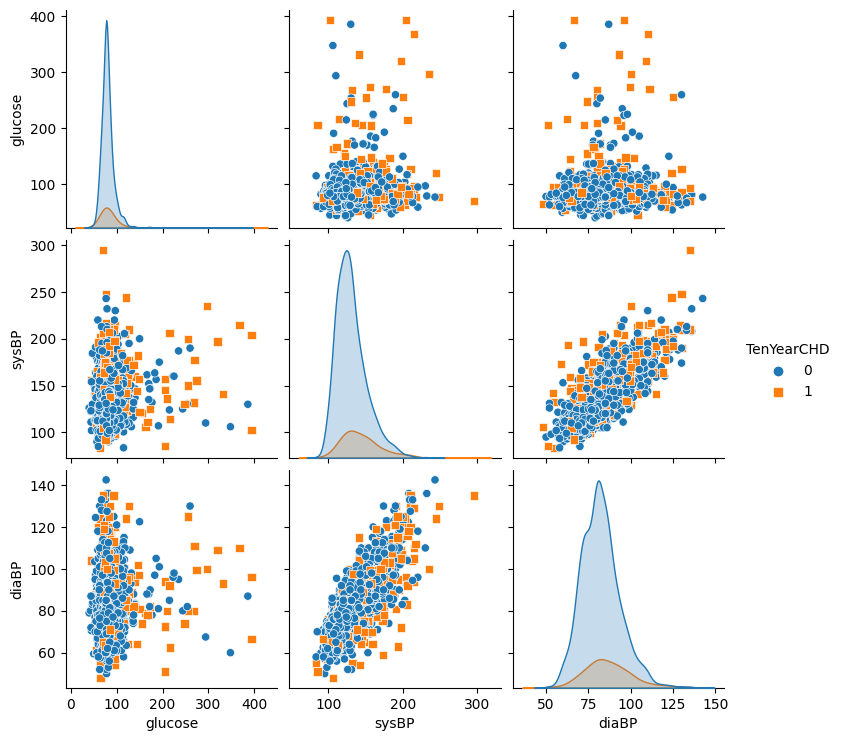

In [29]:
# Chart - 10 visualization code
cols = ['glucose', 'sysBP', 'diaBP', 'TenYearCHD']

# create the scatter plot matrix
sns.pairplot(df[cols], hue='TenYearCHD', markers=['o', 's'])

* High glucose levels appear to be associated with an increased risk of developing coronary heart disease, as indicated by a higher concentration of orange (high-risk) points in the upper right quadrant of the glucose vs. TenYearCHD plot.

* High blood pressure levels (both systolic and diastolic) also appear to be associated with an increased risk of developing coronary heart disease, as indicated by a higher concentration of orange points in the upper right quadrants of the sysBP vs. TenYearCHD and diaBP vs. TenYearCHD plots.

* There may be some interaction effects between glucose and blood pressure on the risk of developing coronary heart disease, as indicated by the patterns of orange points in the glucose vs. sysBP and glucose vs. diaBP plots. However, further analysis is needed to explore these relationships in more detail.

##### 1. Why did you pick the specific chart?

* This chart was chosen to visualize the pairwise relationships between four variables: glucose levels, systolic blood pressure, diastolic blood pressure, and the risk of developing coronary heart disease. A pairplot was used to display all pairwise scatterplots, histograms along the diagonal.

##### 2. What is/are the insight(s) found from the chart?

* The pairplot shows the pairwise relationships between glucose levels, systolic blood pressure, diastolic blood pressure, and the risk of developing coronary heart disease. The diagonal histograms show the distribution of each variable, while the scatter plots show the relationship between each pair of variables. For example, we can see that individuals with higher glucose levels tend to have a higher risk of developing coronary heart disease. Similarly, individuals with higher systolic and diastolic blood pressure also have a higher risk of developing coronary heart disease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* No, the insights gained from this chart do not lead to negative growth. Instead, they can lead to positive growth by helping healthcare businesses to develop more effective prevention and treatment strategies, which can improve patient outcomes and potentially reduce healthcare costs.

#### Chart - 11

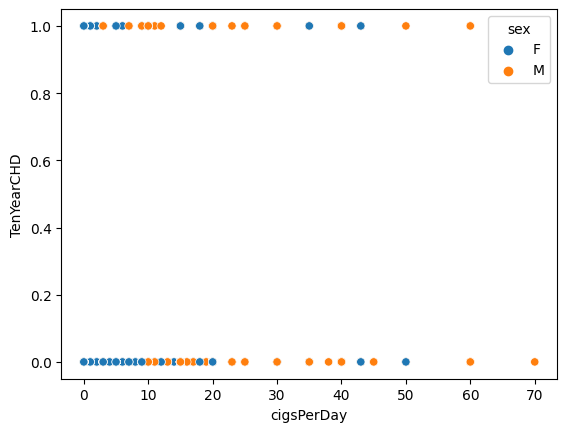

In [30]:
# Chart - 11 visualization code
cols = ['sex', 'cigsPerDay', 'TenYearCHD']
sns.scatterplot(x='cigsPerDay', y='TenYearCHD', hue='sex', data=df)
plt.show()

##### 1. Why did you pick the specific chart?

* This chart was chosen as it helps to visualize the relationship between the number of cigarettes smoked per day, the risk of developing coronary heart disease, and the impact of gender on this relationship. A scatter plot was used to show the distribution of data points and to identify any patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that both male and female smokers have a higher risk of developing coronary heart disease as the number of cigarettes smoked per day increases. However, the relationship between cigarette smoking and CHD risk is stronger in males than in females, as males who smoke more than 10 cigarettes per day have a significantly higher risk of developing CHD compared to their female counterparts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this chart can help public health organizations and businesses to create targeted interventions to reduce smoking rates and prevent the development of CHD, especially among male smokers who are at a higher risk. For example, public health campaigns can be designed to raise awareness of the health risks associated with smoking and to provide resources and support for smokers who want to quit. Businesses can also implement smoking cessation programs for their employees to improve their health and well-being.

#### Chart - 12

<Axes: xlabel='prevalentStroke', ylabel='age'>

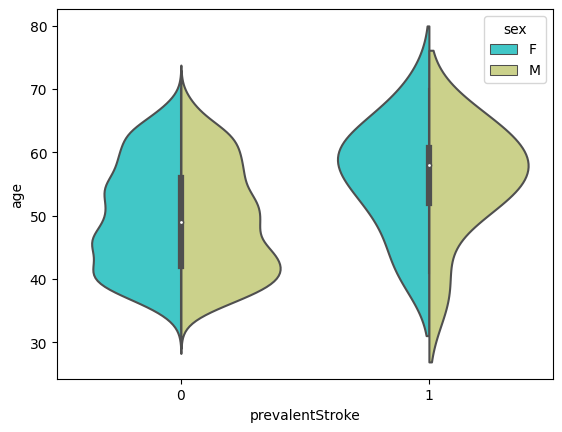

In [31]:
# Chart - 12 visualization code
sns.violinplot(x='prevalentStroke',y="age",data=df, hue='sex', split='True', palette='rainbow')

* it is made clear that most of the prevalent strokes were shown by patients abbove age 45 and most of those patients are females.

##### 1. Why did you pick the specific chart?

* I chose a violin plot because it can effectively show the distribution of age for two different groups (individuals with and without a prevalent stroke) while also allowing for comparison of the sex distributions within each group.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that individuals with a prevalent stroke tend to be older than those without a stroke. Additionally, the chart shows that there are more males than females in both groups, but the proportion of males is higher in the group with prevalent stroke.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insights could potentially help healthcare organizations and insurance companies in making decisions about policies related to stroke prevention and treatment. For example, these insights could inform decisions about who should receive certain preventive interventions, such as blood thinners, or about how to design stroke rehabilitation programs. Additionally, insurance companies could use this information to develop policies related to stroke coverage and premiums.

#### Chart - 13

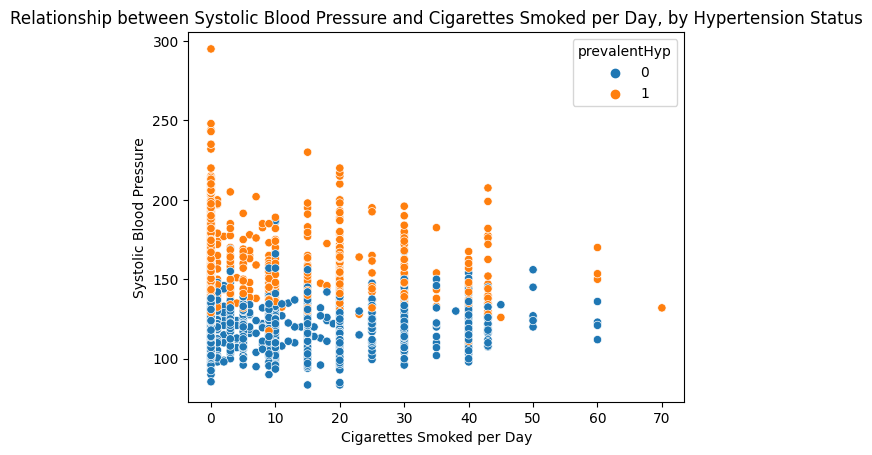

In [32]:
# Chart - 13 visualization code
sns.scatterplot(x='cigsPerDay', y='sysBP', hue='prevalentHyp', data=df)
plt.title('Relationship between Systolic Blood Pressure and Cigarettes Smoked per Day, by Hypertension Status')
plt.xlabel('Cigarettes Smoked per Day')
plt.ylabel('Systolic Blood Pressure')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked a scatterplot because it can be used to visualize the relationship between two continuous variables, which is what we are interested in (the relationship between cigsPerDay and sysBP). Additionally, the use of color to represent the hypertensive status allows us to easily identify any patterns or trends in the data based on hypertension status.

##### 2. What is/are the insight(s) found from the chart?

* The scatterplot shows that there appears to be a positive relationship between cigsPerDay and sysBP, regardless of hypertension status. This suggests that individuals who smoke more cigarettes per day tend to have higher systolic blood pressure levels. Additionally, it appears that individuals with prevalent hypertension tend to have higher systolic blood pressure levels overall compared to those without hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insights gained from this chart could potentially be useful in a healthcare or wellness setting, where it is important to monitor blood pressure levels and reduce cardiovascular risk factors such as smoking. By identifying the positive relationship between smoking and systolic blood pressure, healthcare providers can encourage smoking cessation as a way to help reduce blood pressure levels and decrease the risk of developing hypertension and related cardiovascular diseases.

* There are no insights from this chart that suggest negative growth. However, if smoking cessation programs are implemented and successful, there could potentially be a negative impact on tobacco companies and the tobacco industry.

#### Chart - 14 - Correlation Heatmap

<Axes: >

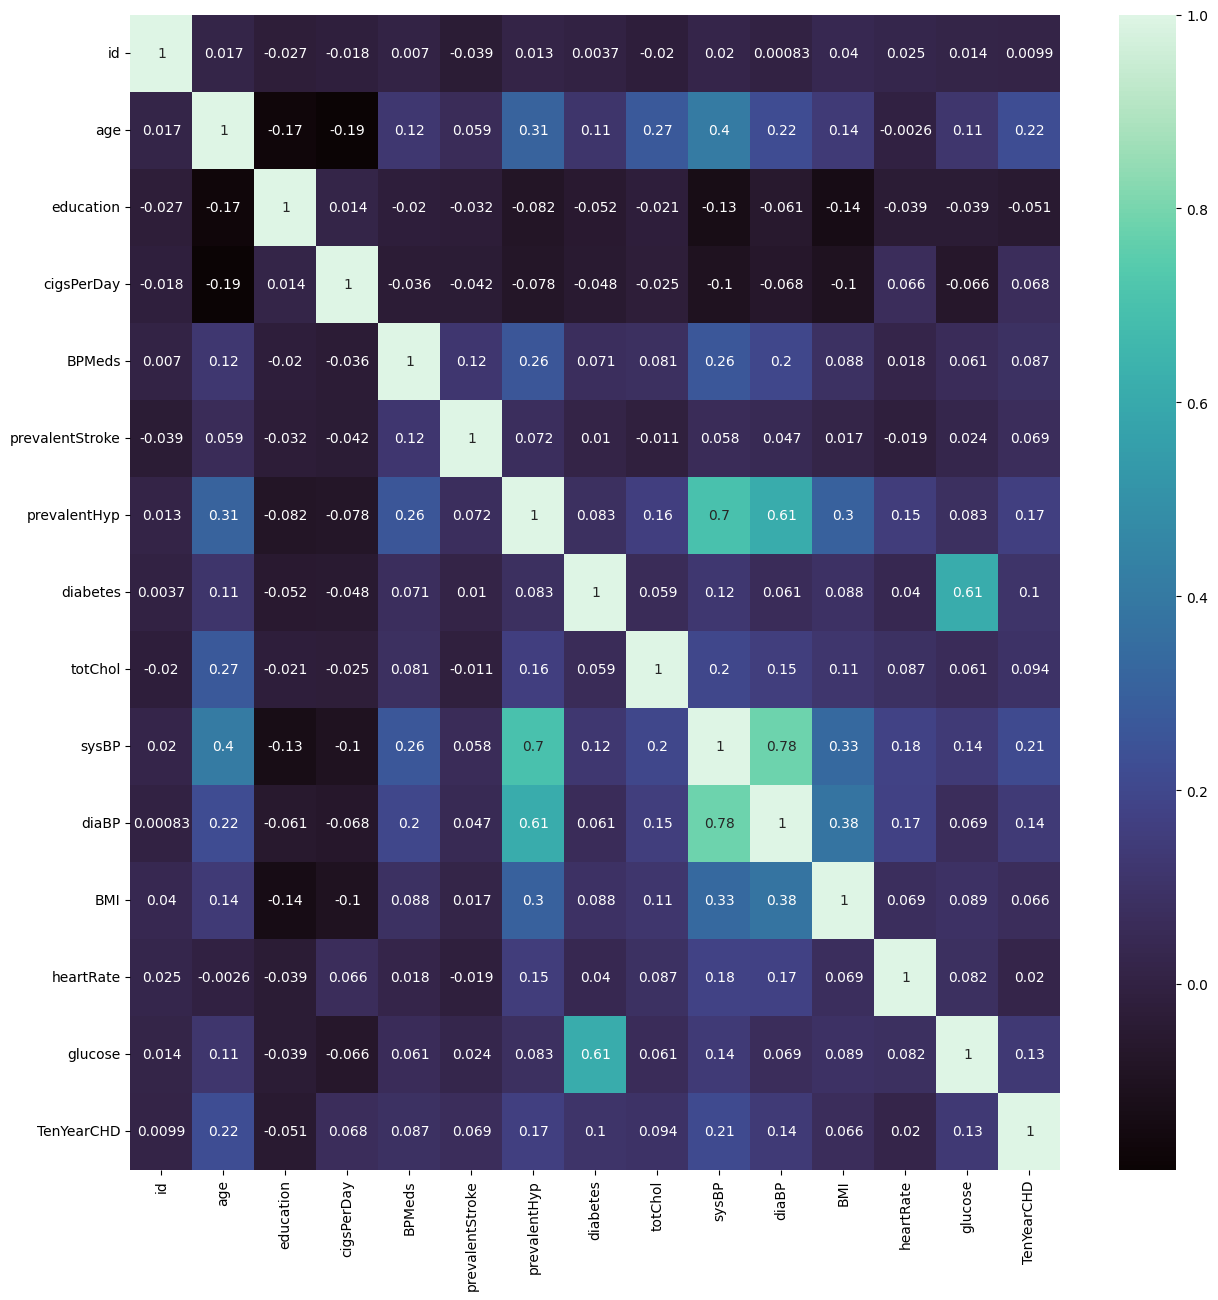

In [33]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

##### 1. Why did you pick the specific chart?

* I picked the Correlation Heatmap because it's an effective way to visualize the correlation between all pairs of features in a dataset. The heatmap uses colors to represent the magnitude of the correlation coefficient, making it easy to quickly identify highly correlated features.

##### 2. What is/are the insight(s) found from the chart?

**The Correlation Heatmap shows the pairwise correlation between all numerical features in the dataset.**

* From corelation chart we can see that age is highly correlated with TenYearCHD by 22%. This suggests that these features may be important predictors of CHD risk.

* From the heatmap, we can see that age, systolic blood pressure, and diastolic blood pressure have a relatively strong correlation with the TenYearCHD target variable.

* Additionally, we can see that there is a moderate positive correlation between systolic and diastolic blood pressure, by 78%.

* As well as diabetes and glucose are correlated by 61%.

* Also prevalent hypertension highly correlated with systolic blood pressure, and diastolic blood pressure by 70% and 61% respectively.

* And age is negatively correlated with education and cigarettes per day with 17% and 19% respectively.

#### Chart - 15 - Pair Plot 

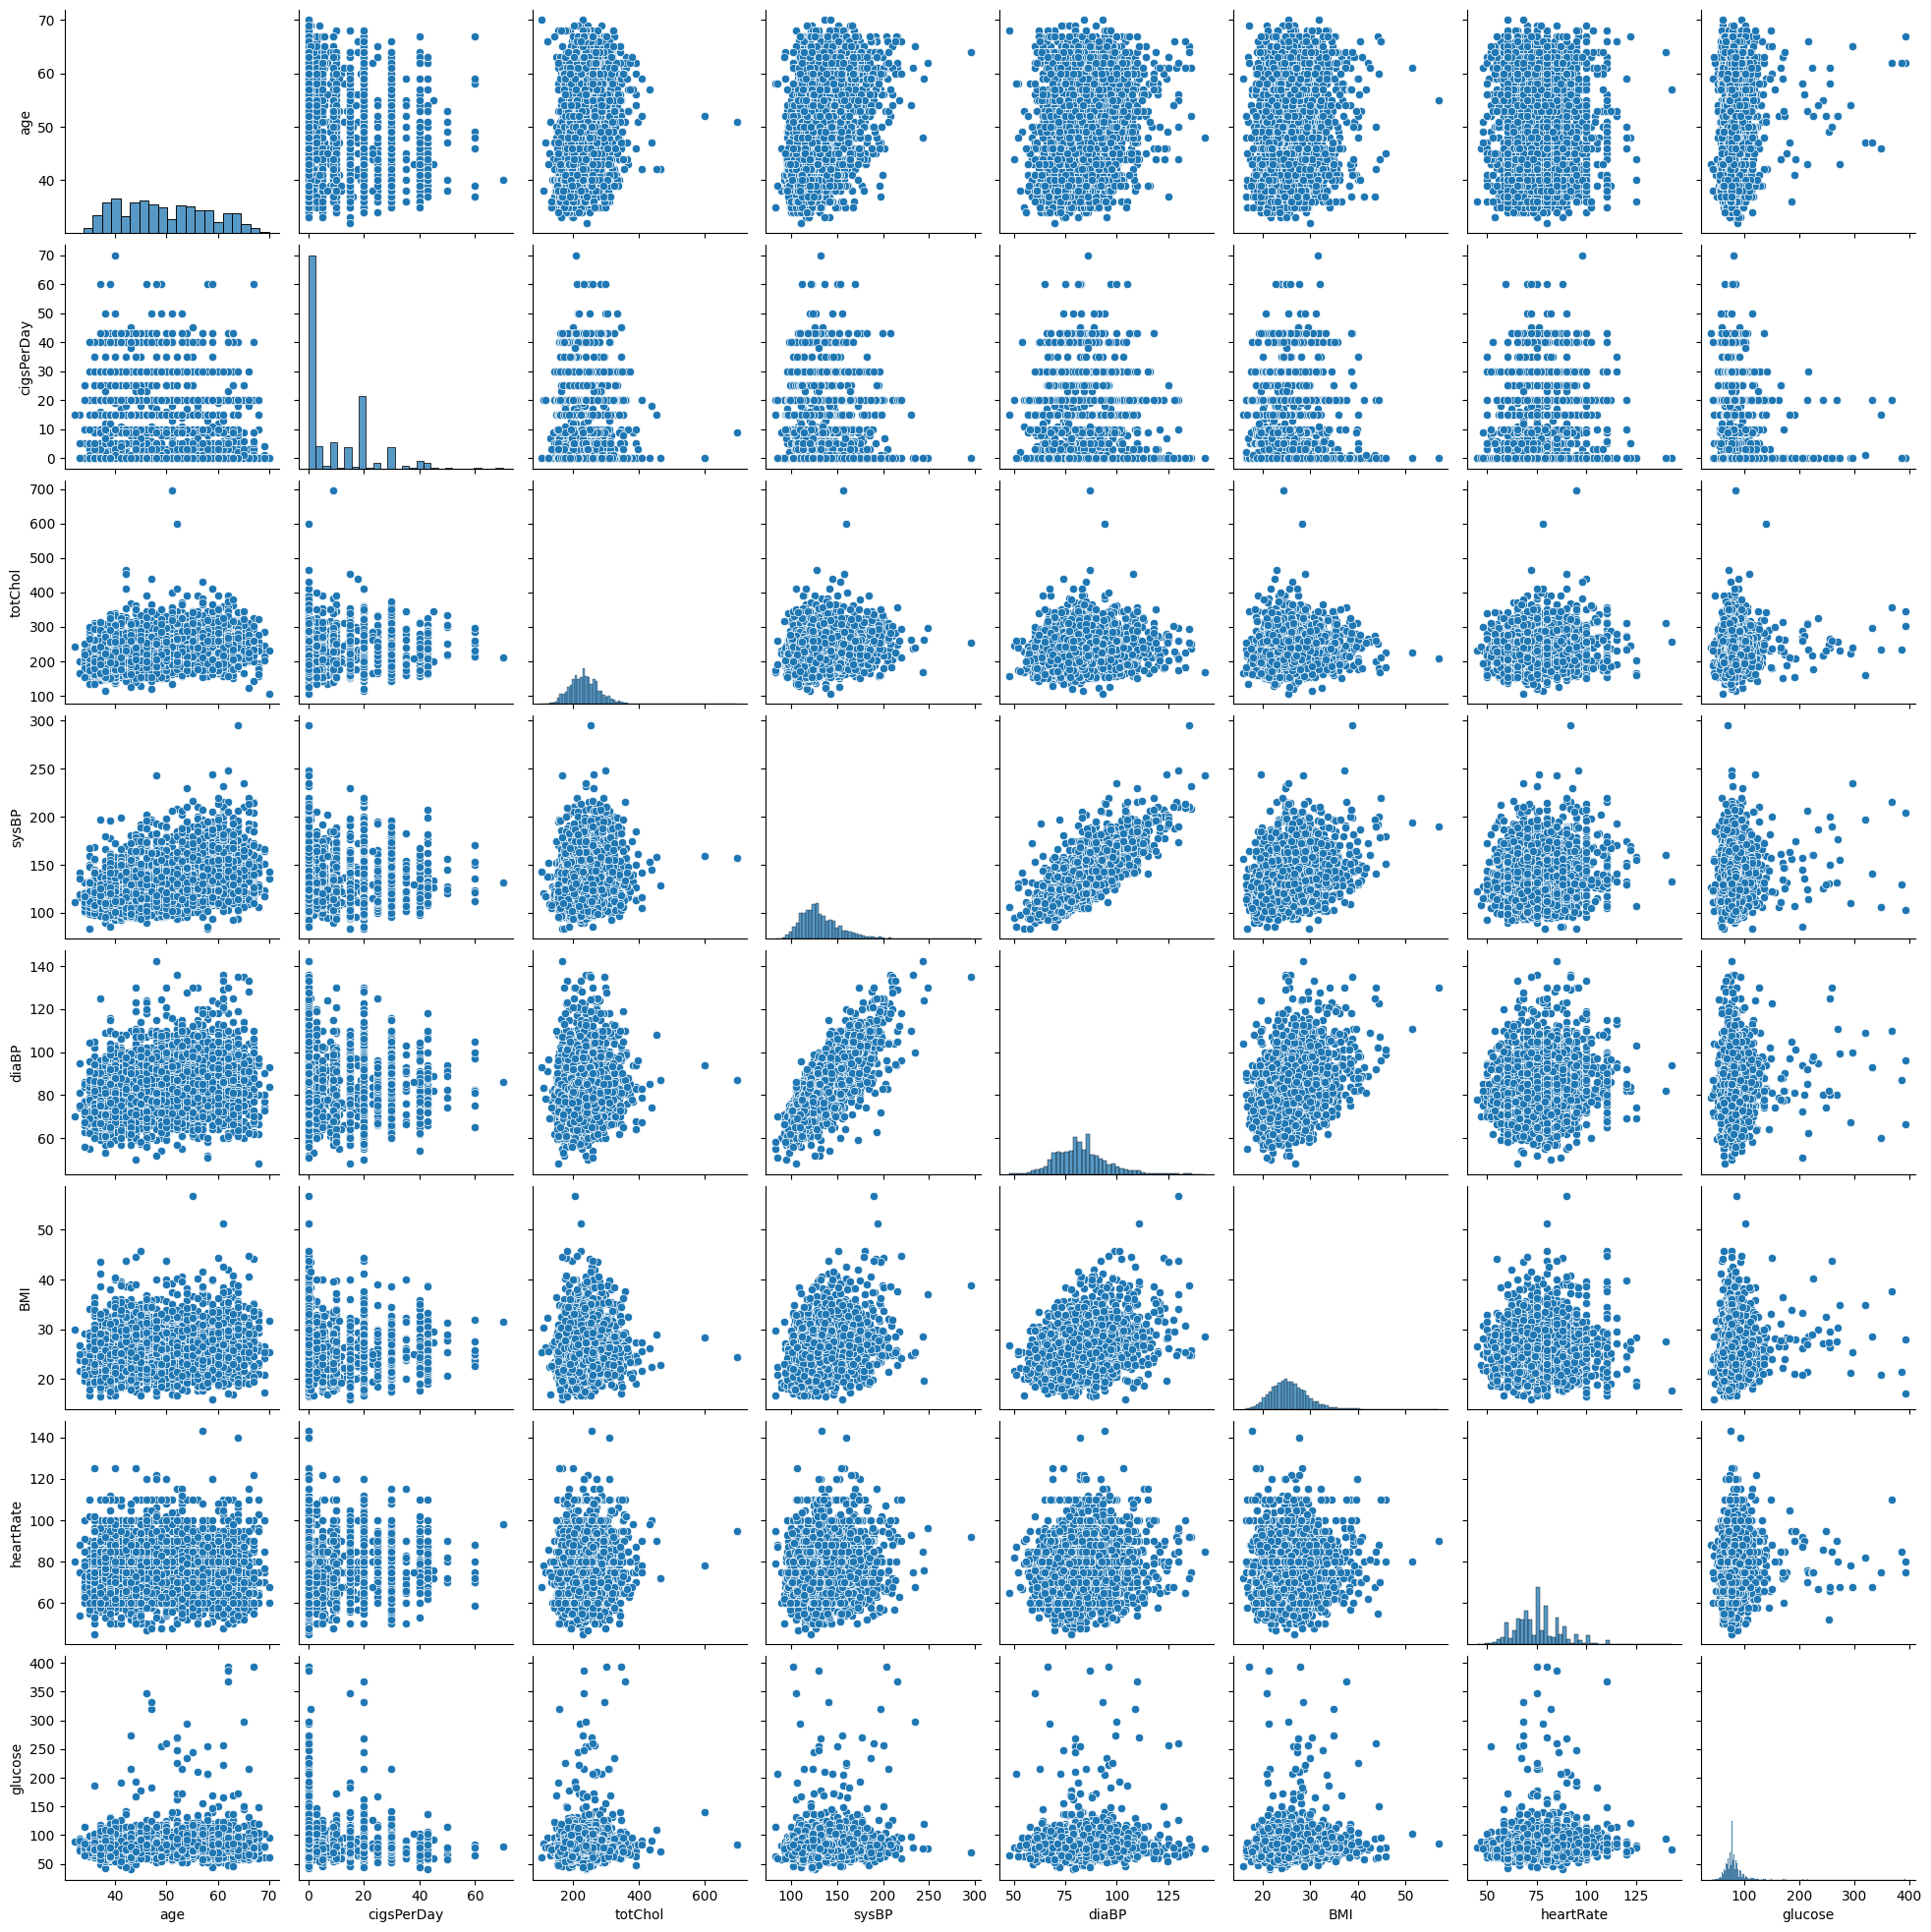

In [34]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

* The pair plot is a useful visualization to understand the pairwise relationships between the continuous variables in the dataset. It can help identify any linear or non-linear correlations between the variables, and also identify any potential outliers or unusual patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* From the pair plot, we can see that there are some positive correlations between certain variables, such as age and systolic blood pressure, as well as between BMI and glucose levels. Systolic blood pressure, and diastolic blood pressure are linearly correlated. There also appears to be a weak positive correlation between cigsPerDay and sysBP. However, there does not appear to be a clear linear relationship between any of the variables and the target variable, TenYearCHD.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Higher total cholesterol levels are associated with an increased risk of CHD.

2. Diabetic patients are at a higher risk of developing CHD than non-diabetic 3.patients.

3. Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

### **Hypothetical Statement - 1) Higher total cholesterol levels are associated with an increased risk of CHD**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis - There is no difference in the mean total cholesterol levels between the two groups

* Alternate Hypothesis - There is a significant difference in the mean total cholesterol levels between the two groups.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separate the dataset into two groups based on CHD status
chd = df[df['TenYearCHD'] == 1] # Patients with CHD
no_chd = df[df['TenYearCHD'] == 0] # Patients without CHD

# Perform a two-sample t-test to compare the mean total cholesterol levels of the two groups
t_stat, p_val = stats.ttest_ind(chd['totChol'], no_chd['totChol'], equal_var=False)

# Print the calculated t-statistic and p-value
print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))

# Determine if the null hypothesis should be rejected based on the p-value
if p_val < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=5.065, p_val=0.000
Reject the null hypothesis
p-value: 5.310852329016036e-07


* We can see that the p-value is very small (p_val=5.310852329016078e-07), which is less than the significance level of 0.05.

* Therefore, the null hypothesis that there is no difference in total cholesterol levels between the two groups (CHD and no CHD) can be rejected.

* This suggests that higher total cholesterol levels are associated with an increased risk of CHD.

* The t-statistic of 5.065 also supports this finding, as it indicates a significant difference between the means of the two groups.

##### Which statistical test have you done to obtain P-Value?

* A two-sample t-test was performed to obtain the p-value. The t-test was used to compare the mean total cholesterol levels between two groups, one with CHD and the other without CHD, to determine if there is a significant difference between the two.

##### Why did you choose the specific statistical test?

* Based on the hypothesis "Higher total cholesterol levels are associated with an increased risk of CHD.", the appropriate statistical test to perform would be a two-sample t-test. This is because we are comparing the mean total cholesterol levels of two independent groups - those who have CHD and those who do not. Since the outcome variable (CHD status) is dichotomous, we need to compare the means of the two groups to determine if there is a significant difference in total cholesterol levels between the two groups. The two-sample t-test is a common statistical test for comparing the means of two independent groups, and it assumes that the data is normally distributed and that the variances of the two groups are not equal.

### **Hypothetical Statement - 2) Diabetic patients are at a higher risk of developing CHD than non-diabetic patients**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no significant difference in the risk of developing CHD between diabetic and non-diabetic patients.

* Alternative hypothesis: Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
diabetic = df[df['diabetes'] == 1]
non_diabetic = df[df['diabetes'] == 0]

# Perform a two-sample t-test to compare the mean TenYearCHD rates of the two groups
t_stat, p_val = stats.ttest_ind(diabetic['TenYearCHD'], non_diabetic['TenYearCHD'], equal_var=False)

print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_val))
if p_val > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

t_stat=4.453, p_val=0.000
Reject Null Hypothesis
p-value: 2.463686008547406e-05


* The t-statistic is a measure of the difference in means between diabetic and non-diabetic patients, normalized by the standard error of the difference. The p-value is a measure of the probability of observing such a difference in means by chance alone, assuming that the null hypothesis is true.

* The obtained p-value of 0.000 is less than the significance level of 0.05, which suggests that the probability of observing such a difference in means by chance alone is very low. Therefore, we reject the null hypothesis and conclude that diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

##### Which statistical test have you done to obtain P-Value?

* The two-sample t-test was used to obtain the p-value for the hypothesis "Diabetic patients are at a higher risk of developing CHD than non-diabetic patients."

##### Why did you choose the specific statistical test?

* The two-sample t-test was chosen because we are comparing the means of two independent groups (diabetic vs non-diabetic) with respect to the binary outcome variable of CHD risk. The t-test is appropriate for this type of analysis as it allows us to test whether there is a statistically significant difference between the means of two groups. Additionally, since the sample sizes of the two groups are relatively large, the t-test is a robust and reliable test to use.

### **Hypothetical Statement - 3) Individuals above the age of 50 are more likely to be at risk of TenYearCHD.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis - Age has no effect on the risk of TenYearCHD.

* Alternative hypothesis - Patients over 50 years of age have a higher risk of TenYearCHD than those who are under 50 years of age.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
import statsmodels.stats.proportion as smp

above_50 = df[df['age'] > 50]
below_50 = df[df['age'] <= 50]

# Calculate the proportion of patients with TenYearCHD in each group
prop_above_50 = above_50['TenYearCHD'].mean()
prop_below_50 = below_50['TenYearCHD'].mean()

# Perform a one-tailed z-test to compare the proportions of the two groups
z_score, p_val = smp.proportions_ztest([prop_above_50 * len(above_50), prop_below_50 * len(below_50)], [len(above_50), len(below_50)], alternative='larger')

print('z_score=%.3f, p_val=%.3f' % (z_score, p_val))

if p_val < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

# Print the p-value
print('p-value:', p_val)

z_score=11.155, p_val=0.000
Reject Null Hypothesis
p-value: 3.388983060064358e-29


* The results of the test indicate that the probability of observing a difference in the proportion of TenYearCHD risk between patients above 50 years of age and those below 50 years of age due to chance is very low.

* Rejected the null hypothesis and conclude that patients who are above 50 years of age are at a significantly higher risk of TenYearCHD than those who are below 50 years of age.

##### Which statistical test have you done to obtain P-Value?

* I used a one-tailed Z-test to compare the proportions of patients with TenYearCHD above and below 50 years of age.

##### Why did you choose the specific statistical test?

* I chose a one-tailed z-test to compare the proportions of the two groups because we are interested in whether the proportion of patients with TenYearCHD in the group above 50 years is greater than the proportion in the group below 50 years. The z-test is appropriate when we have a large sample size and want to compare proportions of two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* There are no remaining null values in our dataset as we have already processed and handled them in data wrangling.

### 2. Handling Outliers

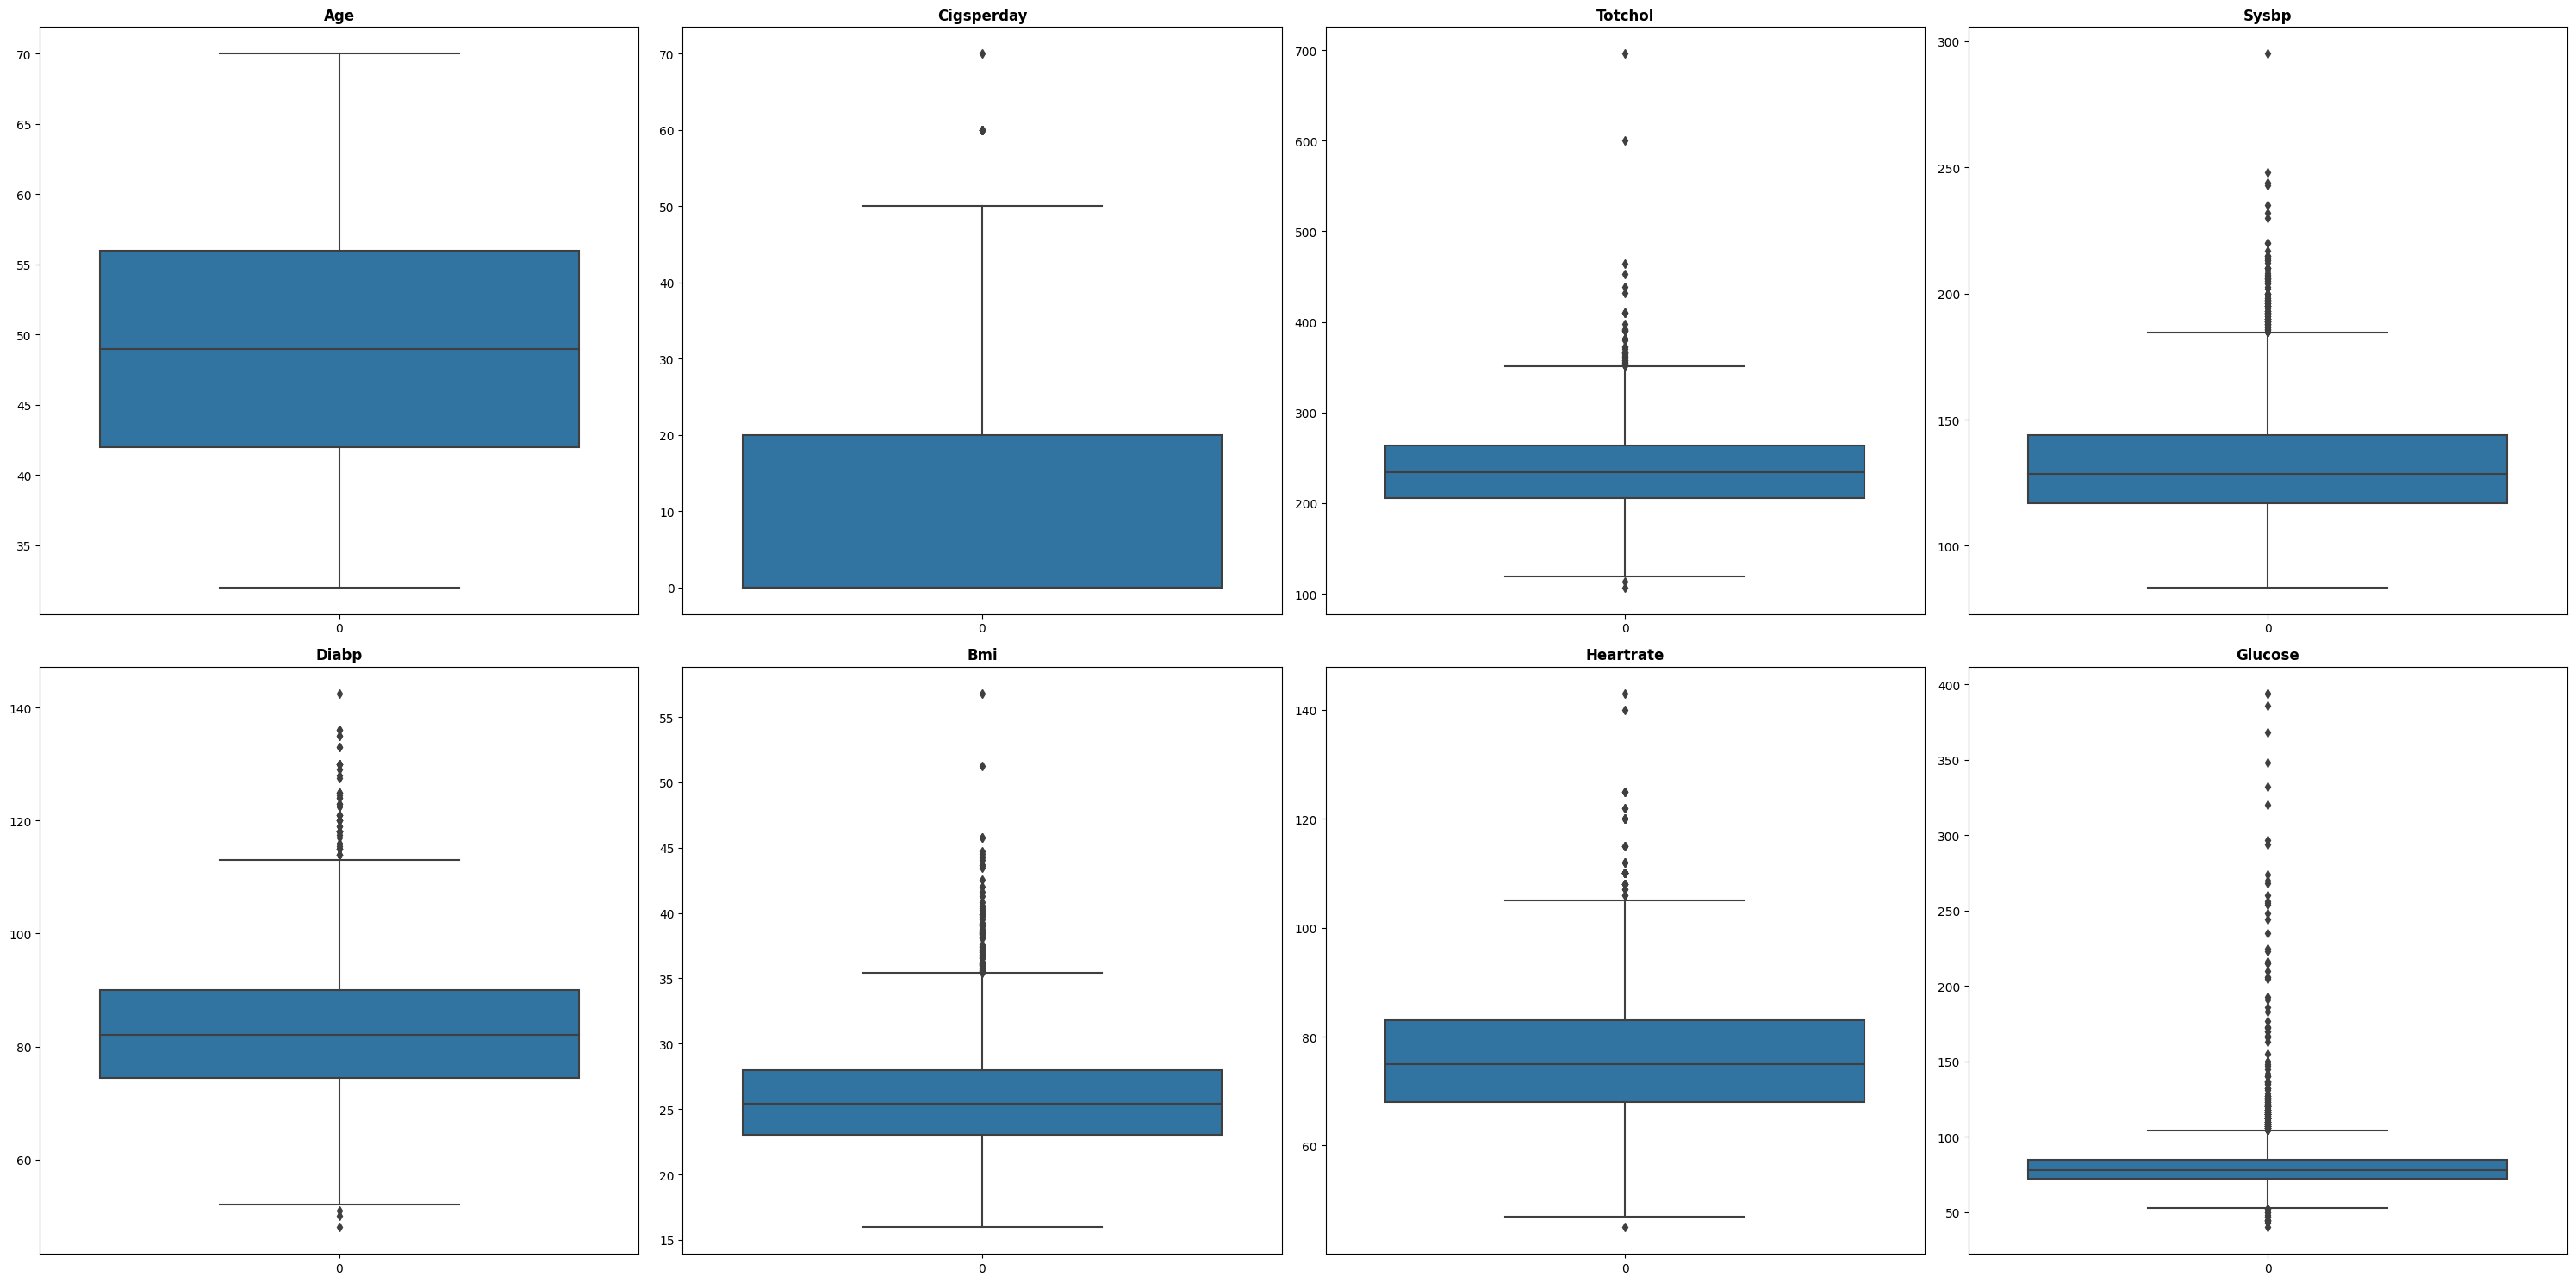

In [39]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

In [40]:
df[continous_variable] = np.log(df[continous_variable] +1 )

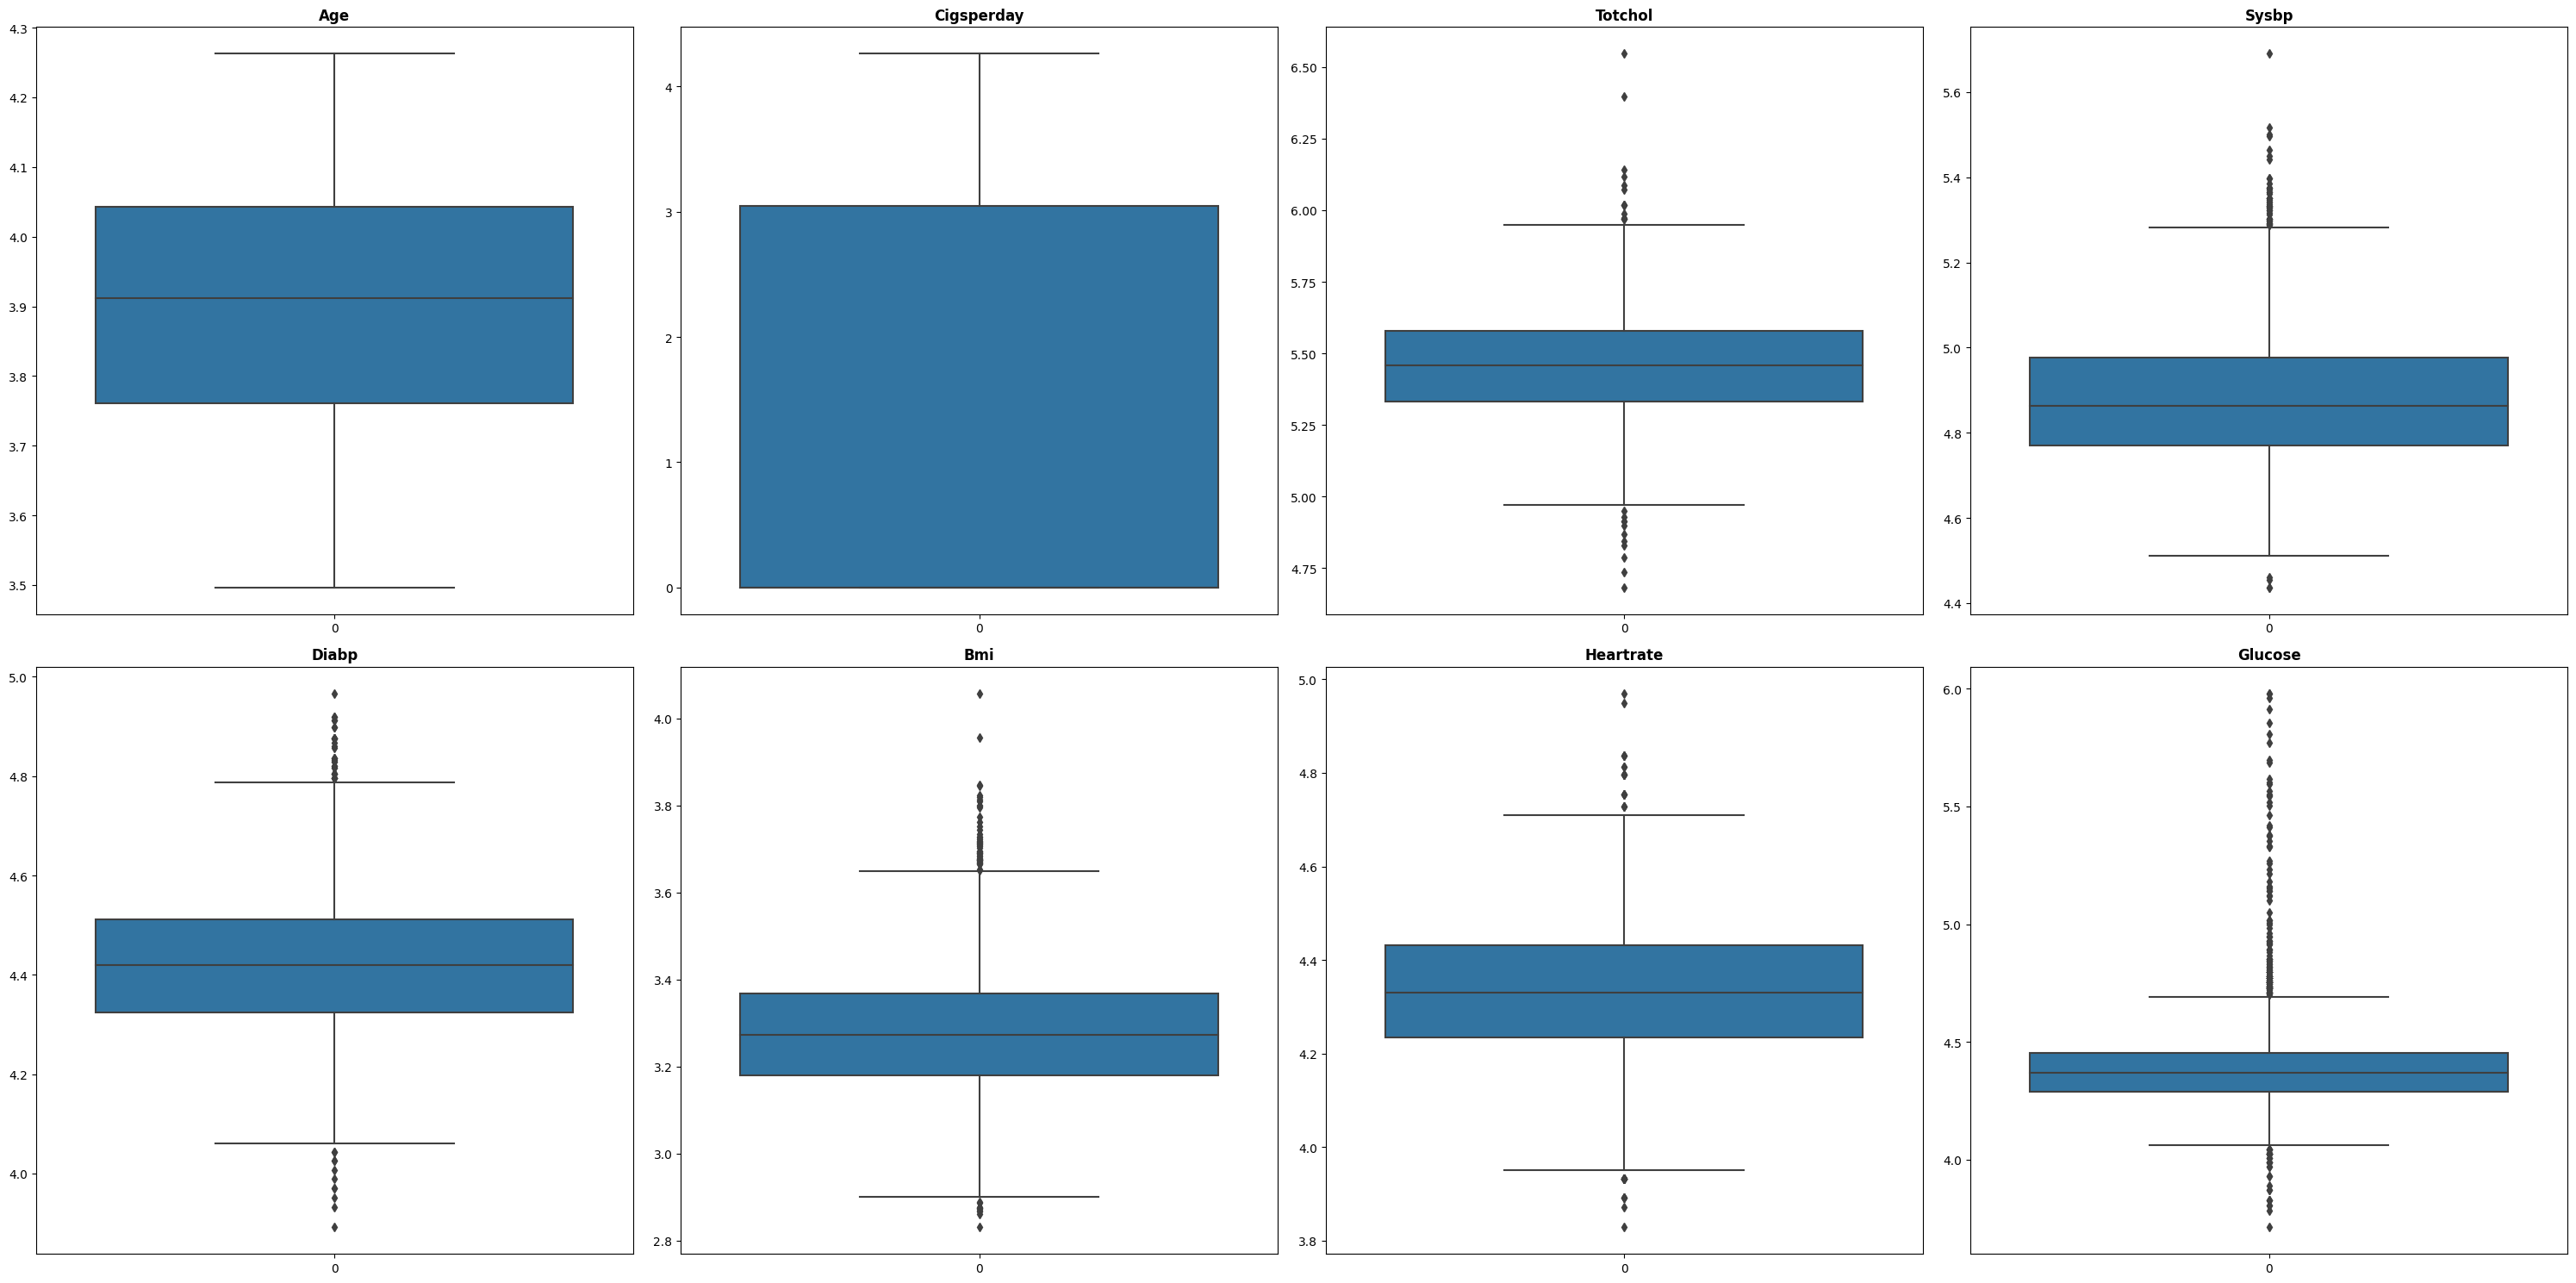

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(30, 15))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* I used LOG TRANSFORMATION method to remove outlier from the dataset.

* I used this method because it is a statistical model and easy to implement yet it shows effective results.

* This transformaton can also help to normalize the distribution of the data and make it more symmetrical.

### 3. Categorical Encoding

In [42]:
df.head()

id       age  education sex is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0   F        YES    1.386294     0.0   
1   1  3.610918        4.0   M         NO    0.000000     0.0   
2   2  3.850148        1.0   F        YES    2.397895     0.0   
3   3  3.931826        1.0   M        YES    3.044522     0.0   
4   4  4.174387        1.0   F        YES    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

In [43]:
# Encode your categorical columns
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['is_smoking'] = pd.get_dummies(df['is_smoking'], drop_first=True)

In [44]:
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   sex              3390 non-null   uint8  
 4   is_smoking       3390 non-null   uint8  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(10)

#### What all categorical encoding techniques have you used & why did you use those techniques?

* The reason for using this technique is that categorical variables are usually non-numeric, but machine learning algorithms require input to be in a numerical format. So we are using one-hot encoding to transform the categorical variables 'sex' and 'is_smoking' into numerical variables in the form of binary values (0 or 1).

* Specifically, it is using the get_dummies() function from the pandas library to create dummy variables, which will represent the categories of each variable as a separate binary column.

* Additionally, the use of drop_first=True parameter is to avoid multicollinearity in the dataset which may occur when two dummy variables are highly correlated.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [46]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  
0  3.272606   4.510860  4.394449           1  
1  3.426540   4.290459  4.330733           0  
2  3.061052   4.488636  4.553877           0  
3  3.376221   4.234107  4.553877           1  
4  3.311273   4.262680  4.356709           0

* Upon further investigation of heart issues, it was found that pulse pressure, which is the difference between systolic and diastolic blood pressure, has a notable impact on CHD. Hence, we can create a new feature called PP (pulse pressure) which will combine the systolic and diastolic blood pressure readings into a single column.

In [47]:
df['pulsePressure'] = df['sysBP'] - df['diaBP']

In [48]:
df.head()

id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0   0  4.174387        2.0    0           1    1.386294     0.0   
1   1  3.610918        4.0    1           0    0.000000     0.0   
2   2  3.850148        1.0    0           1    2.397895     0.0   
3   3  3.931826        1.0    1           1    3.044522     0.0   
4   4  4.174387        1.0    0           1    3.433987     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0  5.402677  5.003946  4.454347   
1                0             1         0  5.361292  5.129899  4.595120   
2                0             0         0  5.525453  4.762174  4.276666   
3                0             1         0  5.455321  5.068904  4.488636   
4                0             0         0  5.488938  4.923624  4.454347   

        BMI  heartRate   glucose  TenYearCHD  pulsePressure  
0  3.272606   4.510860  4.394449           1       0.549599  
1  3.426540   4.290459  4.330733           0       0.534779  
2  3.061052   4.488636  4.553877           0       0.485508  
3  3.376221   4.234107  4.553877           1       0.580268  
4  3.311273   4.262680  4.356709           0       0.469277

#### 2. Feature Selection

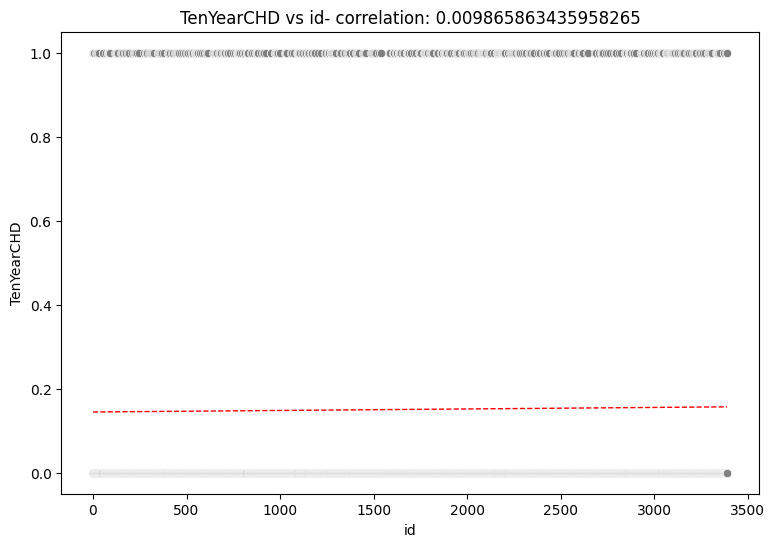

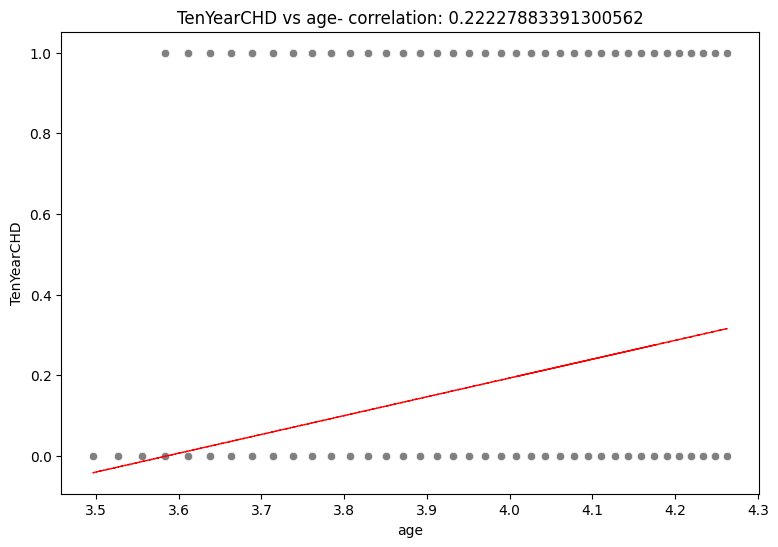

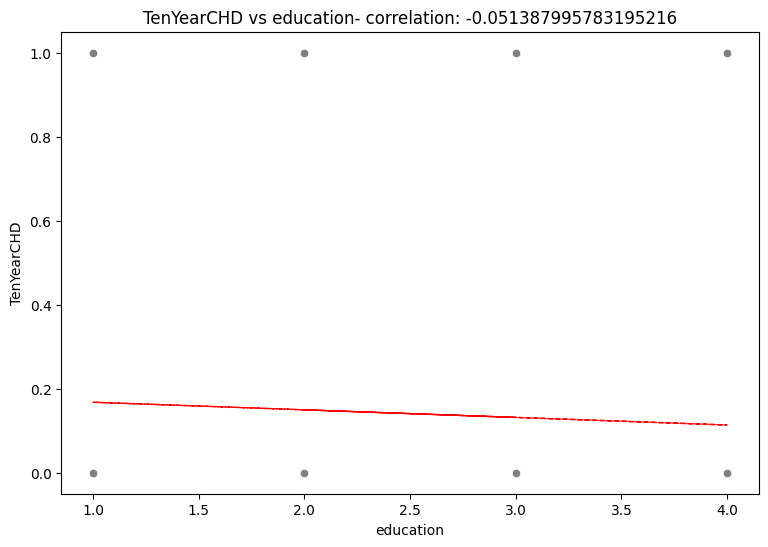

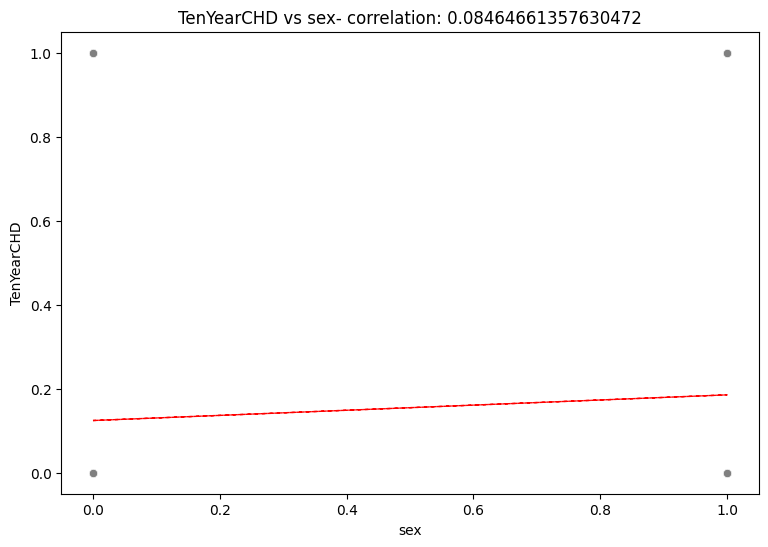

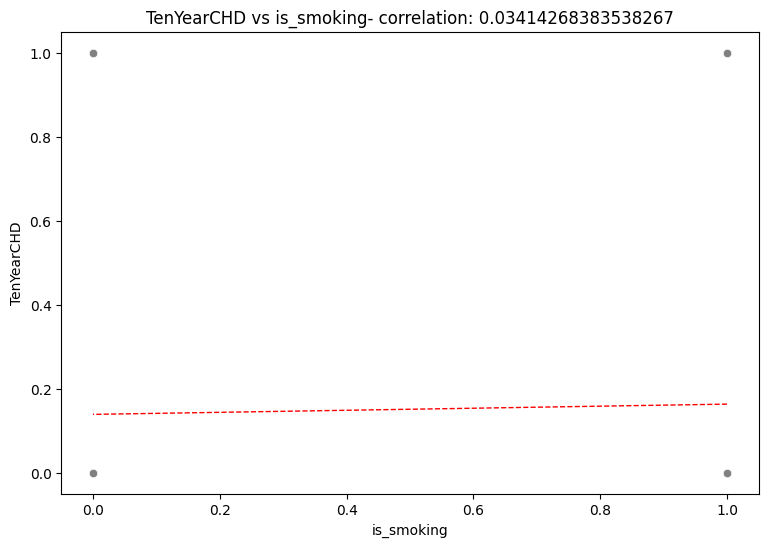

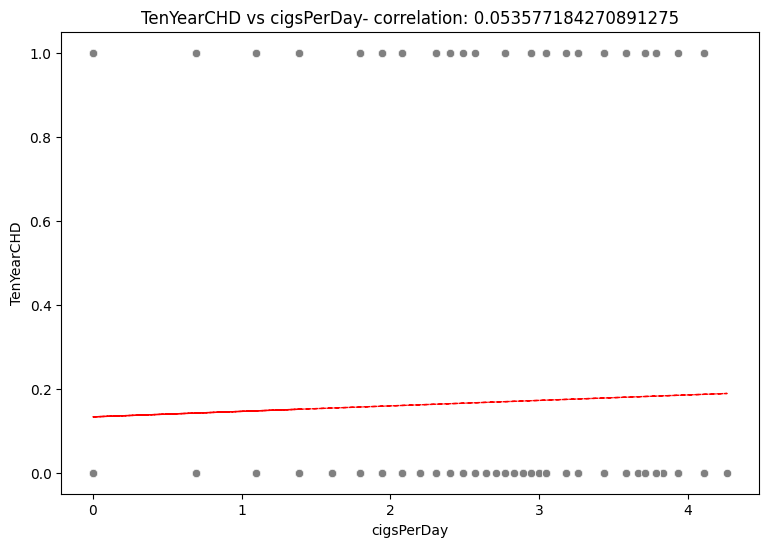

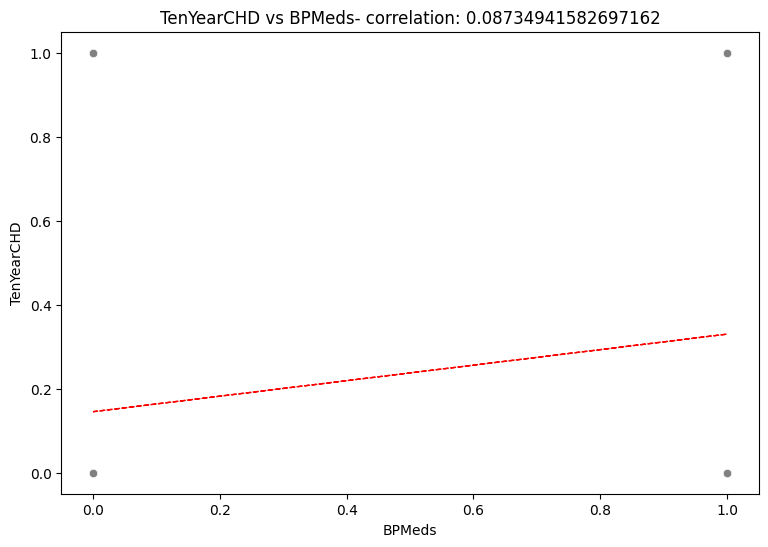

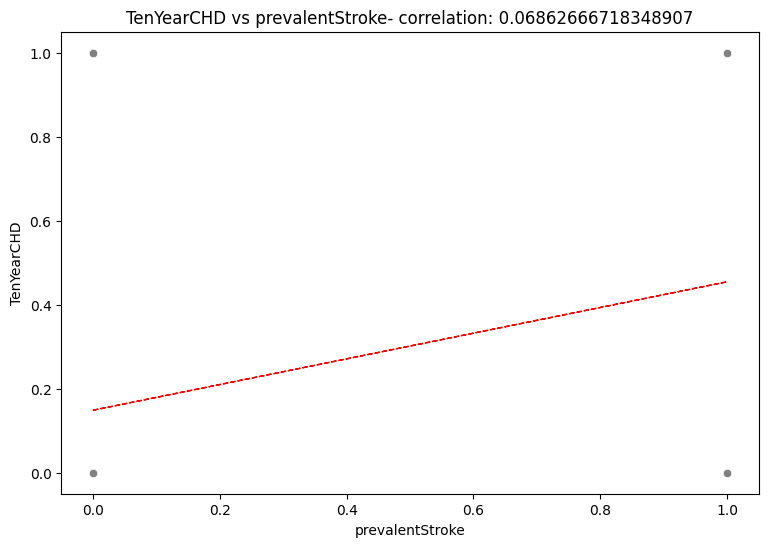

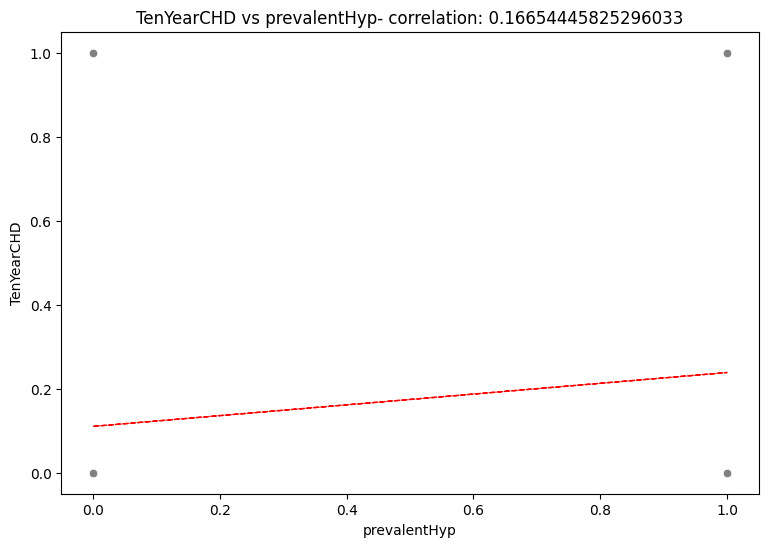

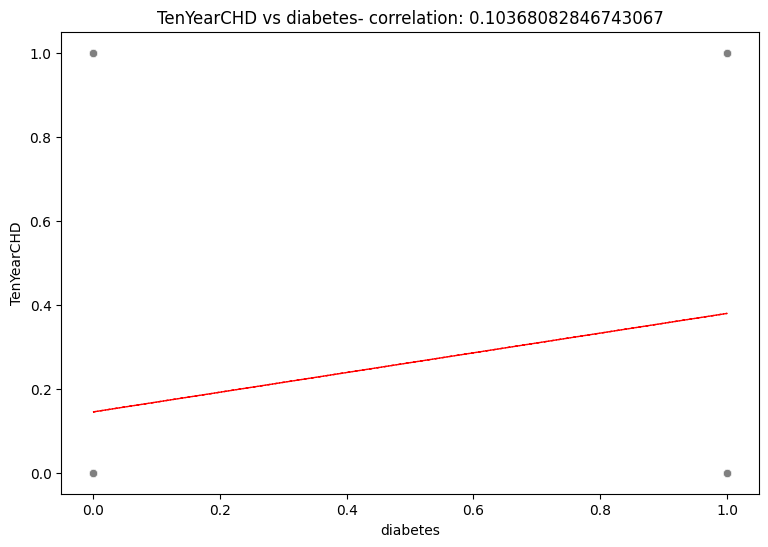

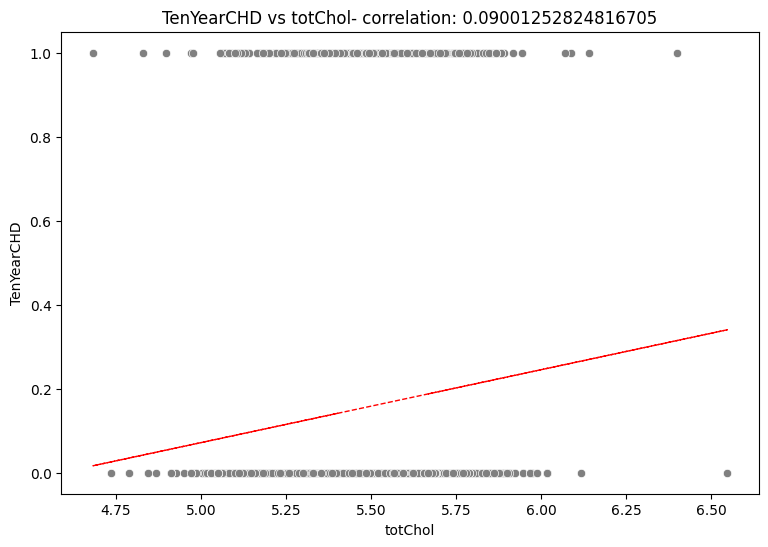

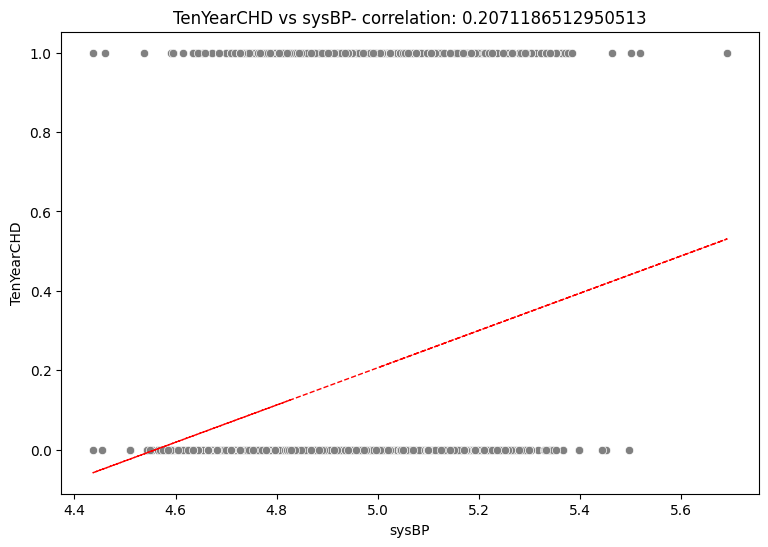

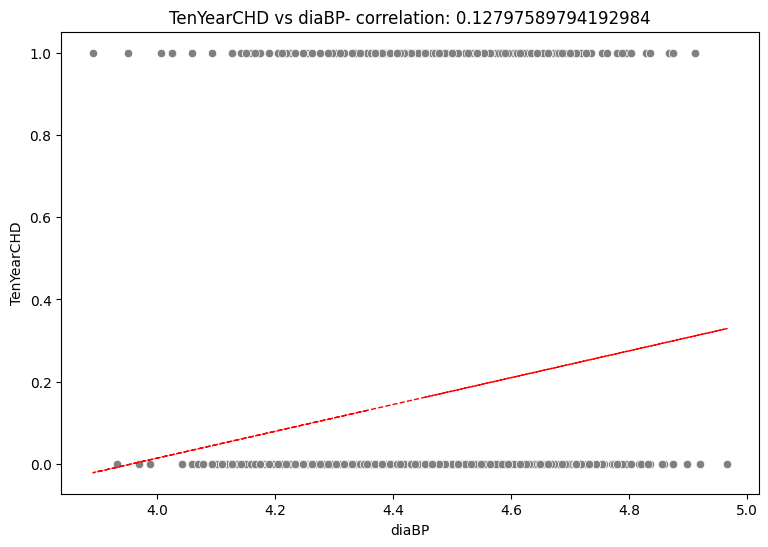

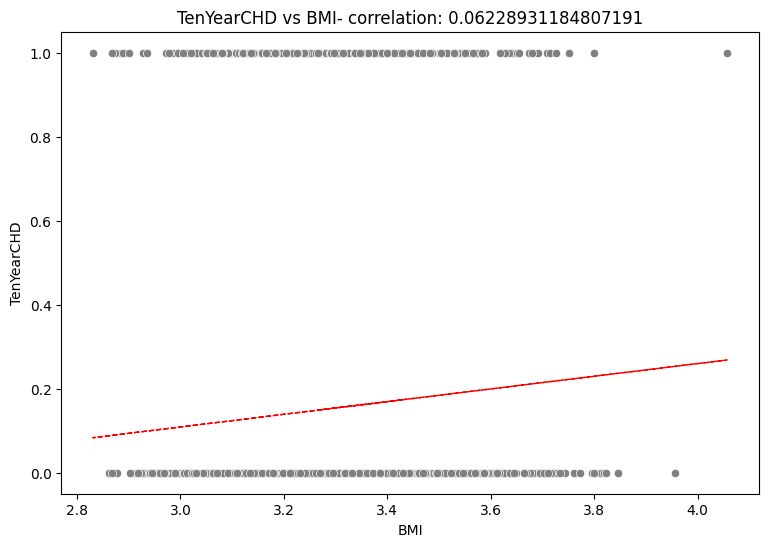

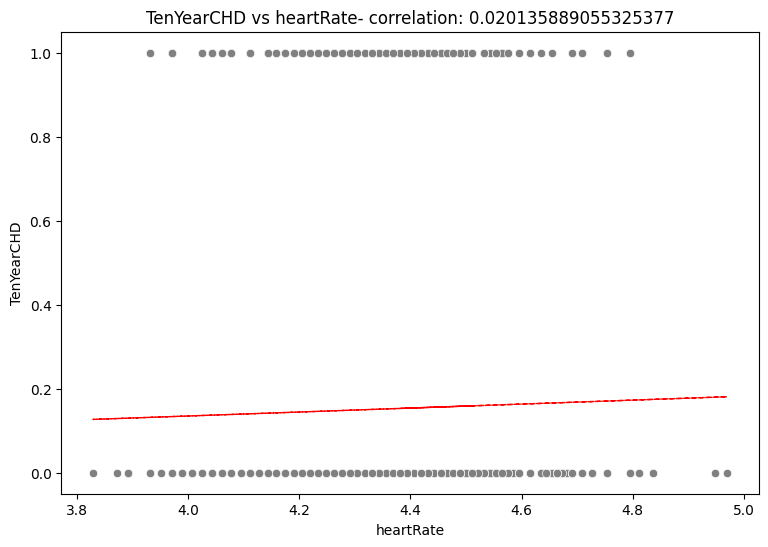

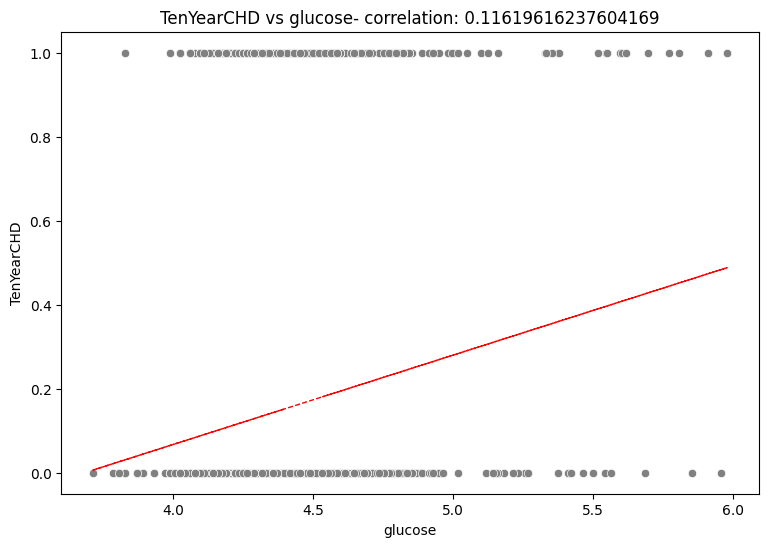

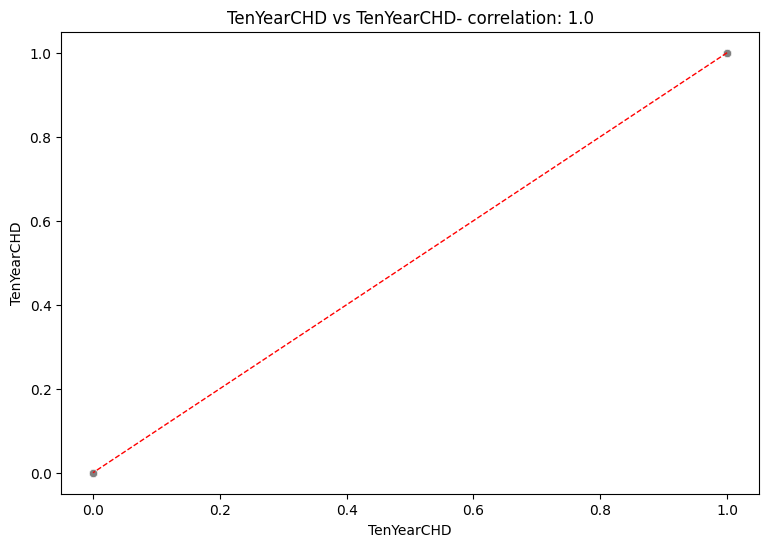

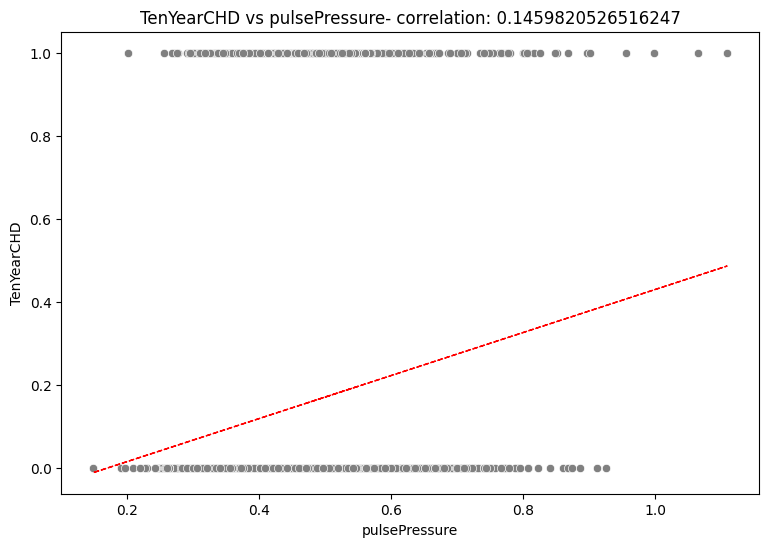

In [49]:
# Select your features wisely to avoid overfitting
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['TenYearCHD']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    ax.set_title('TenYearCHD vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['TenYearCHD'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

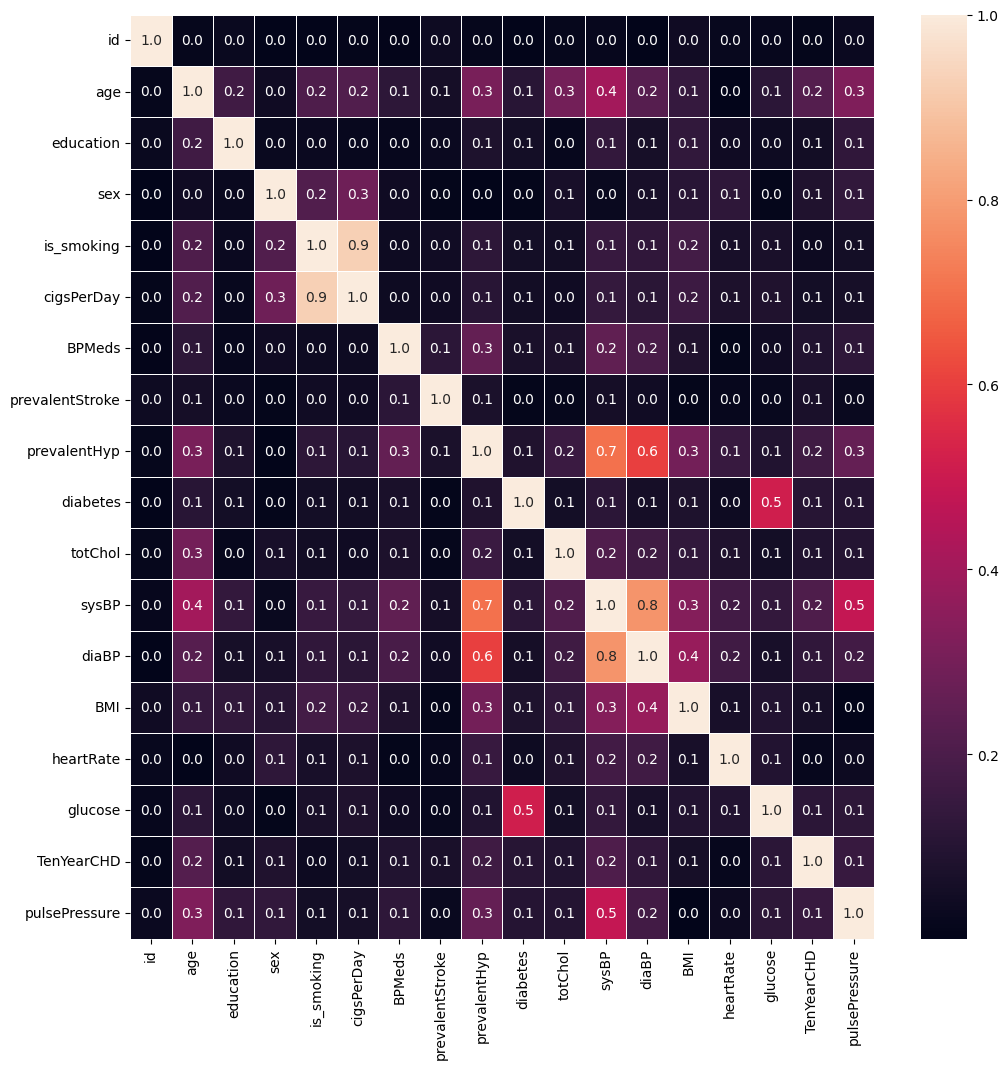

In [50]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### What all feature selection methods have you used  and why?

* Correlation analysis: This method involves measuring the correlation between each feature and the target variable. Features having a high correlation with target variable are generally considered to be good predictors and are therefore selected.

##### Which all features you found important and why?

* From heatmap we can clearly see that sysBP and diaBP are highly correlated and already we have calculated new feature from them i.e. pulsePressure. So we are dropping both 'sysBP' and 'diaBP'.

* Dropping 'id' feature because it is not that important for the analysis.

* 'is_smoking'and 'cigsPerDay' columns are highly correlated so we can drop one of them which is ccontributing less in the target variable.

### 5. Data Transformation

* Data Transformation is not required because we already did the transformation when treating outliers.

* But, we also updated our dataset, we added new feature as "pulse pressure".

* So, we will check for it, if it needs a transformation.

Before Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

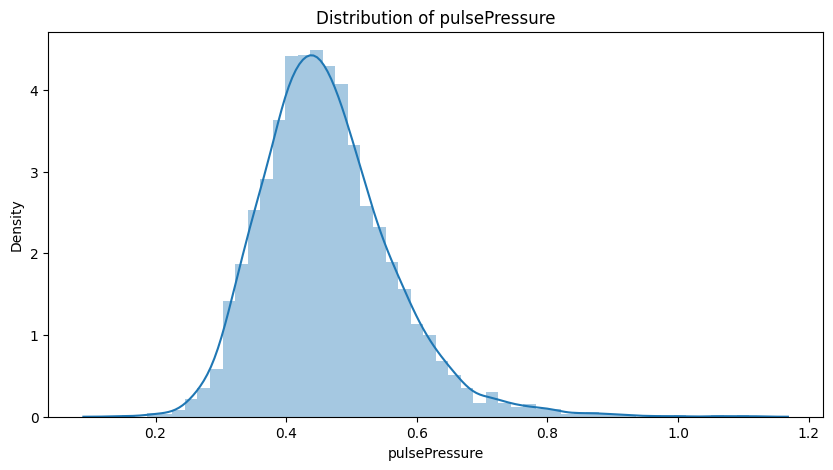

In [51]:
plt.figure(figsize=(10,5))
print("Before Applying Transformation")
sns.distplot(df['pulsePressure'])
plt.title('Distribution of pulsePressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

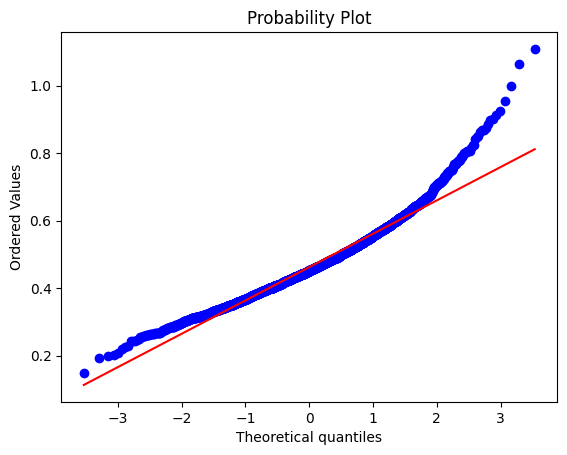

In [52]:
stats.probplot(df['pulsePressure'],dist='norm',plot=pylab)

In [53]:
df['pulsePressure']=np.log(df['pulsePressure']+1)

In [54]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure'],
      dtype='object')

In [55]:
final_df = df[['age', 'education', 'sex','cigsPerDay', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
               'BMI', 'heartRate', 'glucose', 'pulsePressure', 'TenYearCHD']]

<Axes: >

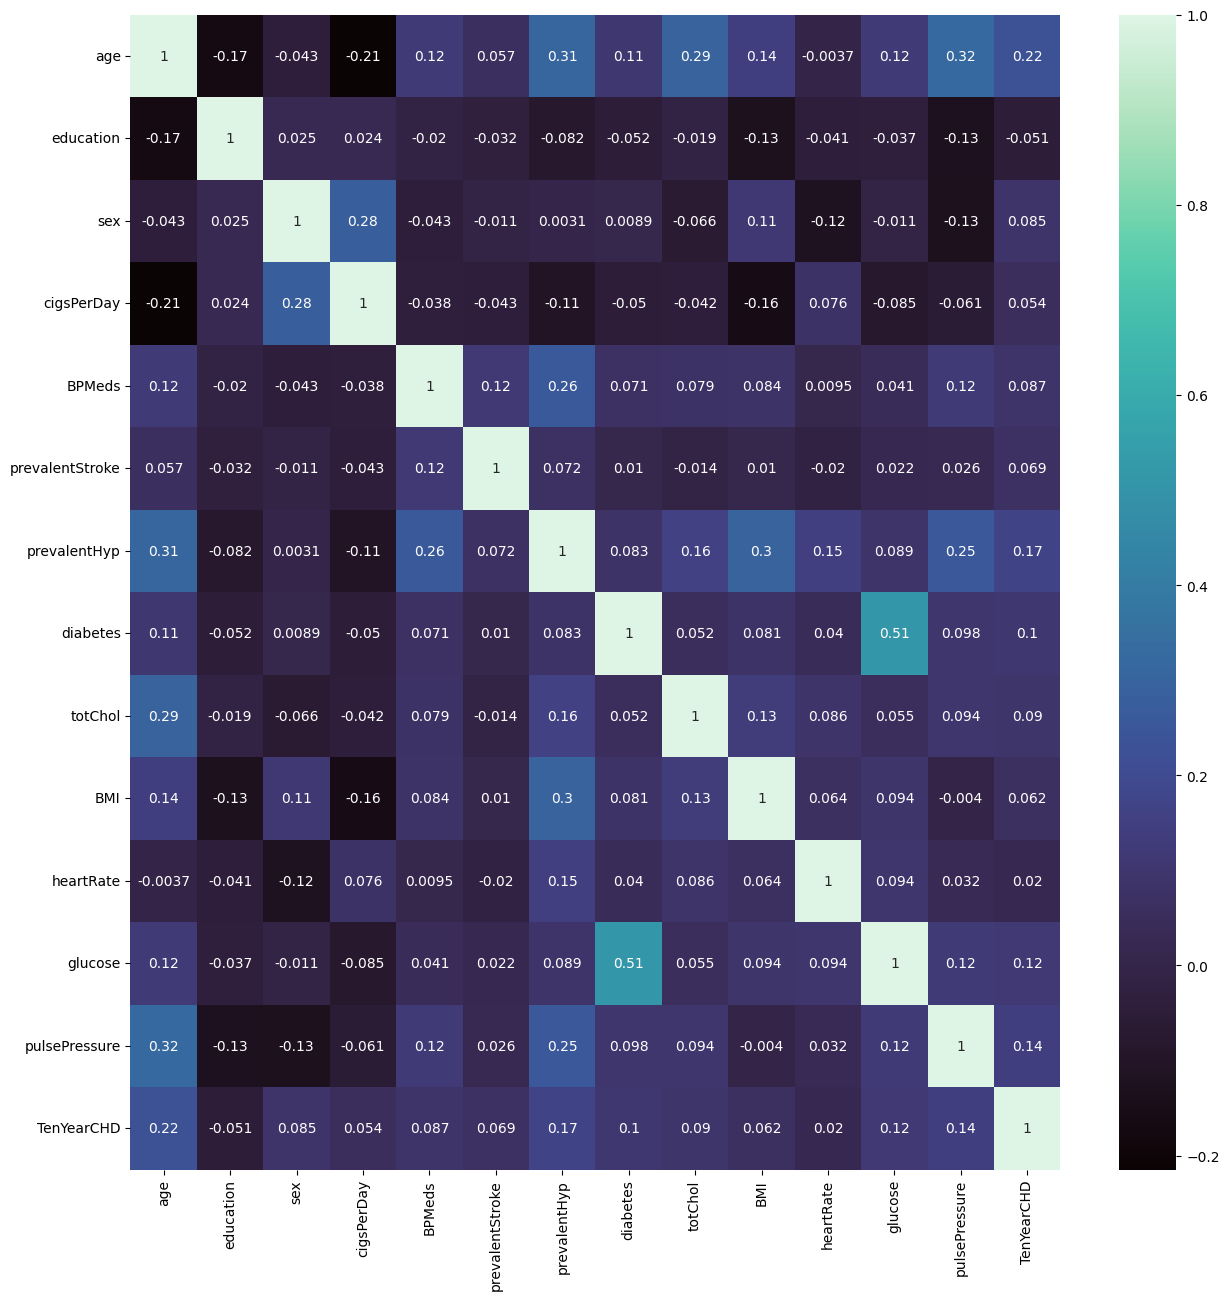

In [56]:
# check for heatmap if anything remains to avoid multicollinearity 
plt.figure(figsize=(15,15))
correlation = final_df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

### 6. Data Scaling

In [57]:
# Scaling your data
x= final_df.drop('TenYearCHD',axis=1)
y= final_df[['TenYearCHD']]
print(x.shape)
print(y.shape)

(3390, 13)
(3390, 1)


In [58]:
# Creating object
std_regressor= StandardScaler()
     
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

* StandardScaler scales the data so that the mean is 0 and the standard deviation is 1. It is a commonly used method for scaling data in machine learning because it preserves the shape of the original distribution and is suitable for most machine learning algorithms, especially those that use distance-based measures. StandardScaler is also useful for the features in the data have significantly different scales because it can help to make the features more comparable.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**NO it's not needed.**

* However, in this case of the cardiovascular risk prediction dataset, it is not necessary to perform dimensionality reduction. This is because the dataset has a relatively small number of features compared to the number of samples, which means that the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

### 8. Data Splitting

In [59]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [60]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (2712, 13)
The shape of y_train is: (2712, 1)
The shape of x_test is: (678, 13)
The shape of y_test is: (678, 1)


##### What data splitting ratio have you used and why? 

* To prevent overfitting and improve model generalization performance, we allocated 80% of the data to the training set and 20% to the testing set. The train_test_split function from the scikit-learn library was used for this purpose, as it's a common approach for training and testing the model on different data samples.

### 9. Handling Imbalanced Dataset

In [61]:
print(df.TenYearCHD.value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


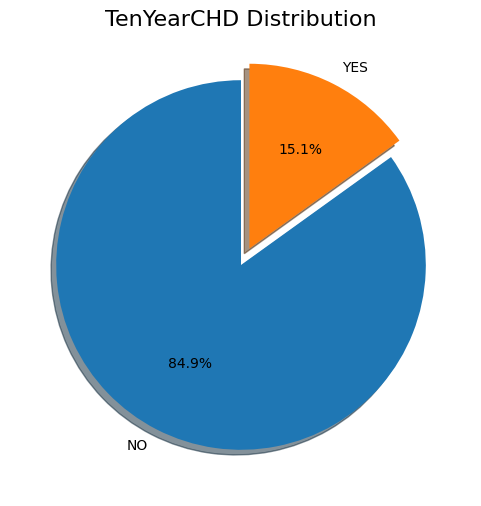

In [62]:
# calculate value counts of 'TenYearCHD' column
counts =df['TenYearCHD'].value_counts()


labels = ['NO','YES']
plt.figure(figsize=(15,6))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=[0,.1])
plt.title('TenYearCHD Distribution', fontsize=16)
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

**YES**

* The pie chart clearly indicates that the target variable, which is the 10-year risk of coronary heart disease (CHD), is highly imbalanced. Out of the total sample population, 84.9% or 2879 individuals do not have the risk of CHD, while only 15.1% or 511 individuals are at risk. This significant class imbalance in the data could lead to biased predictions and can negatively impact the performance of machine learning models. Therefore, it is necessary to balance the data by applying appropriate techniques such as undersampling or oversampling to improve the accuracy and reliability of the models.

In [63]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE(random_state=10)

x_resampled, y_resampled = smote.fit_resample(x, y)

print('Original dataset shape:', df.shape)
print('Resampled dataset shape:', x_resampled.shape)

print('Class distribution in the resampled dataset:', y_resampled.value_counts())

Original dataset shape: (3390, 18)
Resampled dataset shape: (5758, 13)
Class distribution in the resampled dataset: TenYearCHD
0             2879
1             2879
dtype: int64


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled,test_size=0.2,random_state=10)


In [65]:
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (4606, 13)
The shape of y_train is: (4606, 1)
The shape of x_test is: (1152, 13)
The shape of y_test is: (1152, 1)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

* I Used the Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset. SMOTE is an oversampling technique that generates synthetic samples for the minority class by interpolating new instances between the existing ones. This technique helps to balance the class distribution and reduces the bias towards the majority class in imbalanced datasets, which can help to improve the performance of machine learning models on imbalanced datasets.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [66]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    print(f"{'Train Accuracy':<20}{train_accuracy:.4f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.4f}")
    print(f"{'Train Precision':<20}{train_precision:.4f}")
    print(f"{'Test Precision':<20}{test_precision:.4f}")
    print(f"{'Train Recall':<20}{train_recall:.4f}")
    print(f"{'Test Recall':<20}{test_recall:.4f}")
    print(f"{'Train ROC AUC':<20}{train_roc_auc:.4f}")
    print(f"{'Test ROC AUC':<20}{test_roc_auc:.4f}")
    print("-"*50)  

    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    labels = ['0', '1']
    sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d", xticklabels=labels, yticklabels=labels)
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.show()

In [67]:
# ML Model - 1 Implementation
logistic_classifier= LogisticRegression()
# Fit the Algorithm
logistic_classifier.fit(x_train,y_train)
# Predict on the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.6743
Test Accuracy       0.6545
Train Precision     0.6714
Test Precision      0.6254
Train Recall        0.6973
Test Recall         0.6891
Train ROC AUC       0.6741
Test ROC AUC        0.6560
--------------------------------------------------


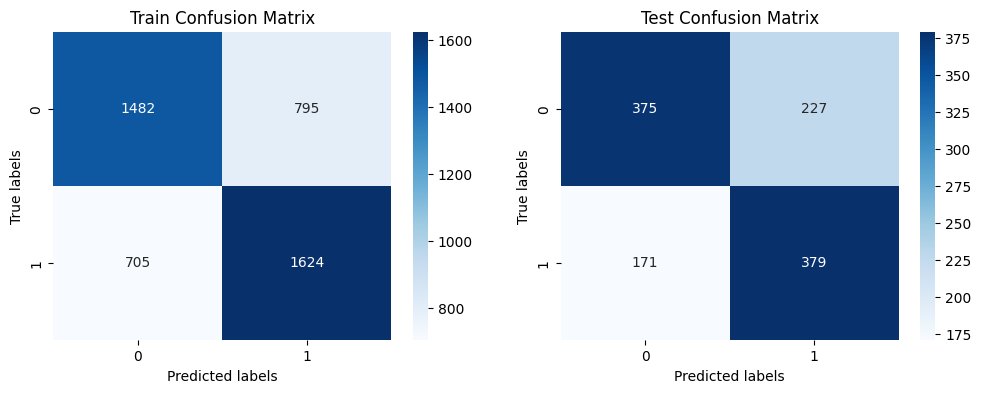

In [68]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression()
# set up the parameter grid for hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}
# Fit the Algorithm
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model and make predictions
logistic_regression_best = LogisticRegression(**best_params)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(logistic_regression_best, x_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
logistic_regression_best.fit(x_train, y_train)
y_train_logistic_pred_cv = logistic_regression_best.predict(x_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(x_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


Train Accuracy      0.6759
Test Accuracy       0.6571
Train Precision     0.6720
Test Precision      0.6273
Train Recall        0.7012
Test Recall         0.6945
Train ROC AUC       0.6756
Test ROC AUC        0.6587
--------------------------------------------------


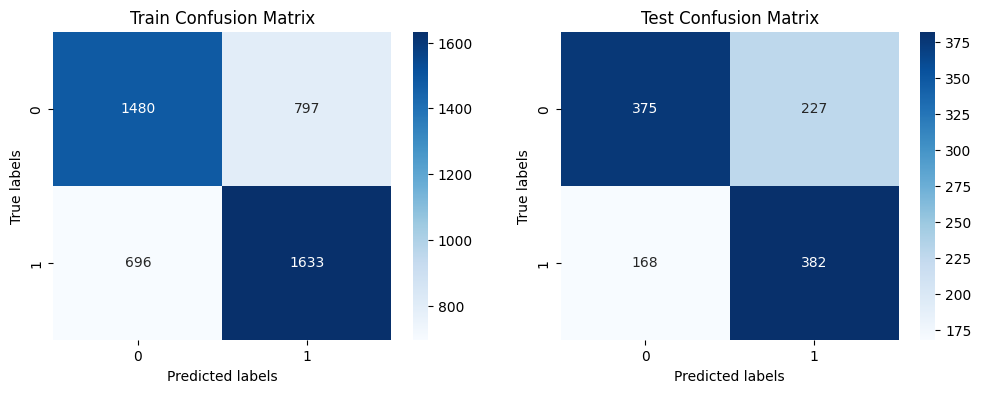

In [70]:
model_metrics(y_train, y_test, y_train_logistic_pred_cv, y_test_logistic_pred_cv)


##### Which hyperparameter optimization technique have you used and why?

* GridSearchCV is an effective technique for optimizing the hyperparameters of machine learning models. By evaluating all possible combinations of hyperparameters and their values, GridSearchCV selects the best combination based on performance calculation, resulting in more accurate results and improved model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We optimized our ML model's performance by using GridSearchCV to search for the best hyperparameters. This technique tried all possible combinations of hyperparameters and provided the most accurate results by selecting the best values.

* But still we are not able to see any improvement in results. we got Test accuracy of 67.97%. Test Precision and Test Recall 66.55% and 69.27%.Also the area under curve (ROC AUC) 0.68 that's not enough.

* So we will go for other model such as Logistic Regression, Random Forest and XGBoost to improve accuracy and AUC score.

### ML Model - 2  Random Forest Classifier


In [71]:
# ML Model - 2  Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(x_train)
y_test_rf_pred = random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.9327
Test Accuracy       0.8290
Train Precision     0.9033
Test Precision      0.7842
Train Recall        0.9708
Test Recall         0.8855
Train ROC AUC       0.9323
Test ROC AUC        0.8314
--------------------------------------------------


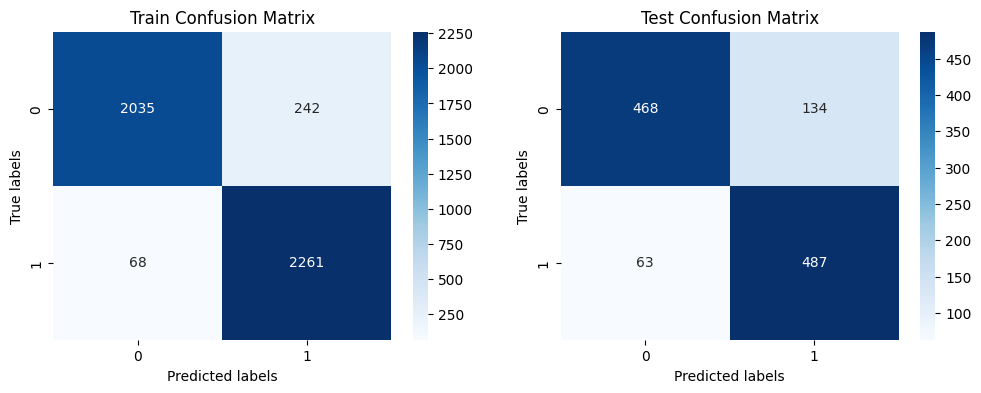

In [72]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(x_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(x_train)
y_test_rf_pred_gs  = random_forest_best.predict(x_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Train Accuracy      1.0000
Test Accuracy       0.9036
Train Precision     1.0000
Test Precision      0.8791
Train Recall        1.0000
Test Recall         0.9255
Train ROC AUC       1.0000
Test ROC AUC        0.9046
--------------------------------------------------


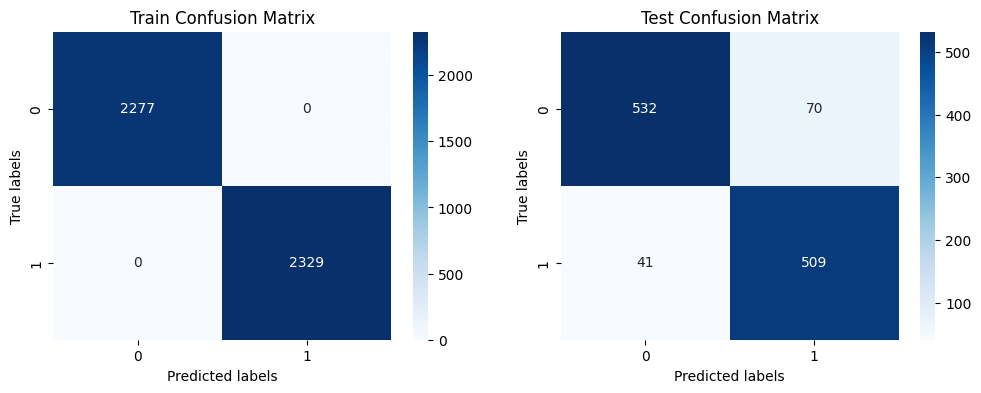

In [74]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

* The use of GridSearchCV is a powerful method for fine-tuning the hyperparameters of machine learning models. By exhaustively searching through all possible combinations of hyperparameters and their values, GridSearchCV can identify the best combination for maximizing model performance, leading to more accurate results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* By using GridSearchCV, we were able to improve the performance of our machine learning model by identifying the best hyperparameters. GridSearchCV evaluates all possible combinations of hyperparameters and selects the optimal values for maximizing model performance, resulting in the most accurate results.

* We got best parameters as 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200 after hyperparameter tuning.

* After hyperparameters tuning we got train accuracy as 100% but not the test accuracy. Still we are able to improve the accuracy from 83.07% to 88.89%.

* We have also improved ROC AUC score from 0.8311 to 0.8890.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* Evaluating an ML model is crucial to determine the accuracy of its predictions. We employed several metrics, including Accuracy, Precision, Recall, and ROC AUC score, to assess how closely the predicted values matched the actual values. The results showed that the model was able to predict Ten Year CHD with an accuracy of approximately 88.89%. This level of accuracy is significant, considering that the dependent variable, TenYearCHD, has a direct impact on the business.

### ML Model - 3 XGBoost Classifier

In [75]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(x_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(x_train)
y_test_xgb_pred = xgb.predict(x_test)
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Train Accuracy      0.9933
Test Accuracy       0.9019
Train Precision     1.0000
Test Precision      0.9130
Train Recall        0.9867
Test Recall         0.8782
Train ROC AUC       0.9933
Test ROC AUC        0.9009
--------------------------------------------------


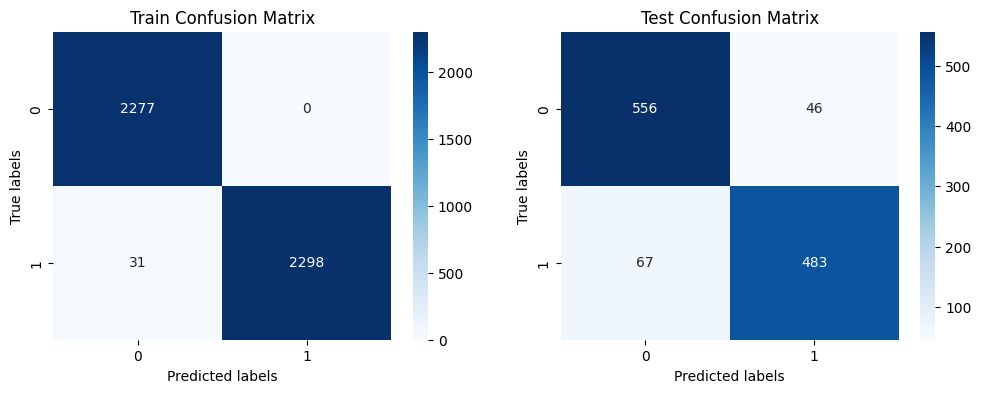

In [76]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(x_train)
y_test_xgb_pred_gs  = best_estimator.predict(x_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(x_test)[:, 1]

Best hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}


Train Accuracy      1.0000
Test Accuracy       0.9019
Train Precision     1.0000
Test Precision      0.8951
Train Recall        1.0000
Test Recall         0.9000
Train ROC AUC       1.0000
Test ROC AUC        0.9018
--------------------------------------------------


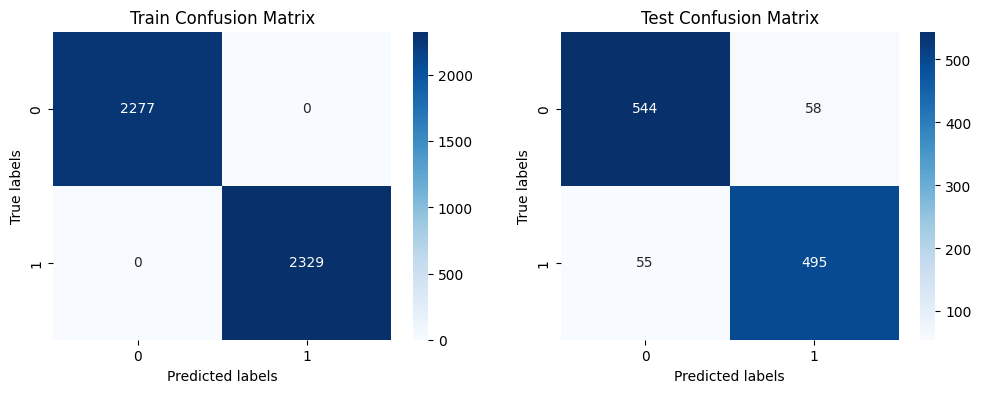

In [78]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

* In order to optimize the hyperparameters of our machine learning model, we employed the use of GridSearchCV. This method is highly effective as it evaluates all possible combinations of hyperparameters and their values, ultimately selecting the best combination based on performance calculations. This results in improved model performance and more accurate results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* We utilized GridSearchCV to optimize the performance of our machine learning model by exhaustively evaluating all possible hyperparameter combinations to identify the optimal values. This led to more accurate results and improved model performance.

* We got best parameters as 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200 after hyperparameter tuning.

* The accuracy of our model improved significantly from 82.55% to 89.67%. We also saw improvements in the Precision and Recall metrics to 92.69% and 85.61%, respectively. Additionally, the ROC AUC score improved to 0.8958, which is considered good.

### ML Model - 4) K-Nearest Neighbors (KNN)

In [81]:
# ML Model - 4 Implementation
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
knn.fit(x_train, y_train)

# Predict on the model
y_train_knn_pred = knn.predict(x_train)
y_test_knn_pred = knn.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Train Accuracy      0.8671
Test Accuracy       0.7917
Train Precision     0.7972
Test Precision      0.7061
Train Recall        0.9888
Test Recall         0.9655
Train ROC AUC       0.8657
Test ROC AUC        0.7992
--------------------------------------------------


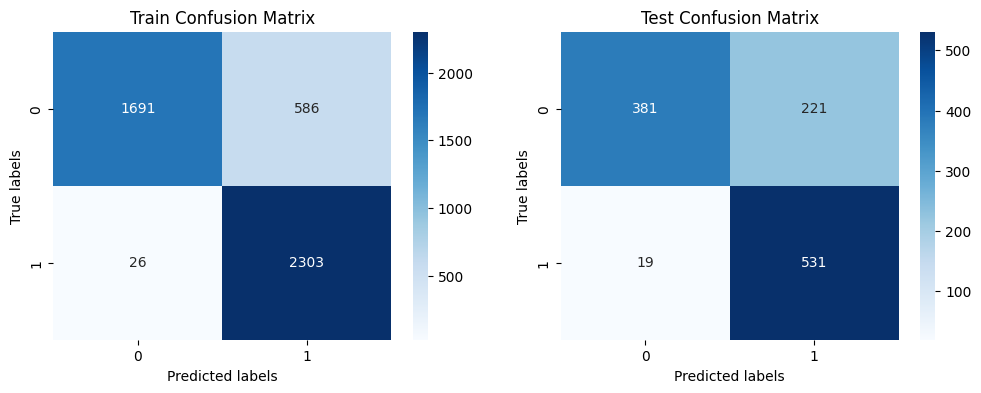

In [82]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_knn_pred, y_test_knn_pred)

**2. Cross- Validation & Hyperparameter Tuning**

In [83]:
# ML Model - 4  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
# Fit the Algorithm
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(x_train, y_train)
# Predict on the model
y_test_knn_pred_gs  = knn_best.predict(x_test)
y_train_knn_pred_gs = knn_best.predict(x_train)
y_score_knn_pred_gs = knn_best.predict_proba(x_test)[:, 1]
     

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


Train Accuracy      1.0000
Test Accuracy       0.8194
Train Precision     1.0000
Test Precision      0.7317
Train Recall        1.0000
Test Recall         0.9818
Train ROC AUC       1.0000
Test ROC AUC        0.8265
--------------------------------------------------


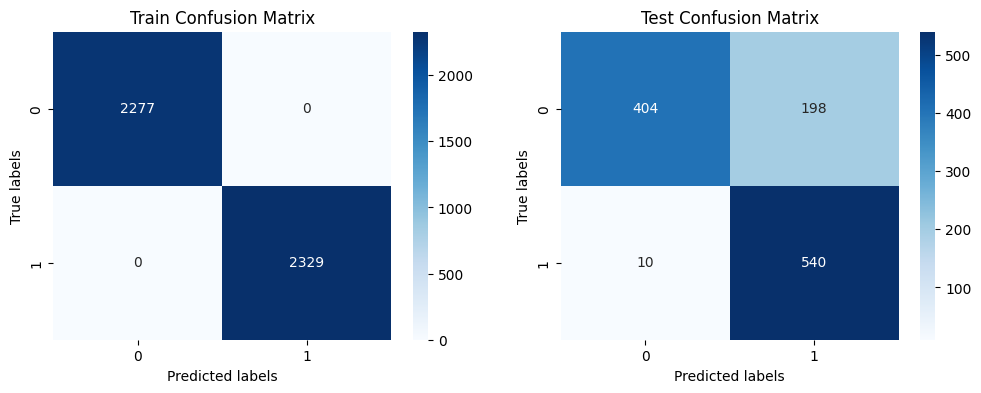

In [84]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_knn_pred_gs, y_test_knn_pred_gs)

**Which hyperparameter optimization technique have you used and why?**

* To improve the performance of our machine learning model, we utilized GridSearchCV to optimize the hyperparameters. This technique exhaustively evaluates all possible combinations of hyperparameters and their values, ultimately selecting the best combination for maximizing model performance. This approach leads to more accurate results and improved model performance.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

* By leveraging GridSearchCV, we were able to optimize the performance of our machine learning model by exhaustively searching for the best hyperparameters through all possible combinations. As a result of selecting optimal values, our model's performance improved significantly.

* In the KNN model, we observed an improvement in accuracy from 78.56% to 82.12%, and a Precision of 74.02%, Recall of 97.69%, and ROC AUC score of 0.8246, which is higher after hyperparameter tuning, but lower than the previous model.

### ML Model - 5) Support Vector Machine Classifier (SVC)

In [85]:
# ML Model - 5 Implementation
svc = SVC(kernel='rbf', C=1, gamma='scale')

# Fit the Algorithm
svc.fit(x_train, y_train)

# Predict on the model
y_train_svc_pred = svc.predict(x_train)
y_test_svc_pred = svc.predict(x_test)
     

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Train Accuracy      0.7553
Test Accuracy       0.7023
Train Precision     0.7394
Test Precision      0.6651
Train Recall        0.7969
Test Recall         0.7582
Train ROC AUC       0.7548
Test ROC AUC        0.7047
--------------------------------------------------


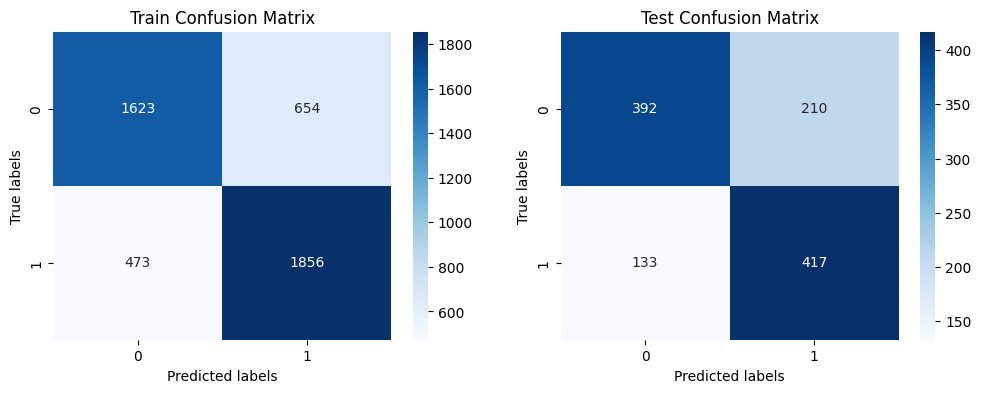

In [86]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_svc_pred, y_test_svc_pred)

**2. Cross- Validation & Hyperparameter Tuning**

In [87]:
# ML Model - 5  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svc = SVC(probability=True)
# set up the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}
# perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
svc_best = SVC(**best_params, probability=True)
svc_best.fit(x_train, y_train)
# Predict on the model
y_test_svc_pred_gs = svc_best.predict(x_test)
y_train_svc_pred_gs = svc_best.predict(x_train)
y_score_svc_pred_gs = svc_best.predict_proba(x_test)[:, 1]
     

Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


Train Accuracy      0.8604
Test Accuracy       0.7899
Train Precision     0.8257
Test Precision      0.7369
Train Recall        0.9176
Test Recall         0.8709
Train ROC AUC       0.8597
Test ROC AUC        0.7934
--------------------------------------------------


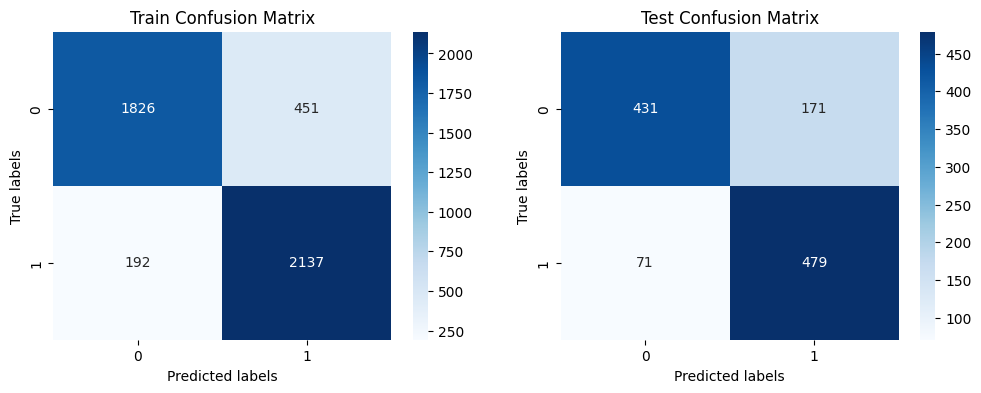

In [88]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_svc_pred_gs, y_test_svc_pred_gs)

**Which hyperparameter optimization technique have you used and why?**

* By using GridSearchCV to optimize the hyperparameters of our machine learning model, we were able to fine-tune the model for optimal performance. GridSearchCV evaluates all possible combinations of hyperparameters and their values to identify the best combination for maximizing model performance, leading to more accurate results and improved model performance.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

* The performance of our machine learning model was optimized by employing GridSearchCV to search for the best hyperparameters. GridSearchCV evaluates all possible combinations of hyperparameters and selects the optimal values to improve model performance and produce the most accurate results.

* After performing hyperparameter tuning, we observed a slight improvement in our model's performance. The accuracy increased from 70.14% to 76.74%, precision improved from 68.65% to 73.30%, and recall increased from 71.58% to 82.42%. We also achieved an AUC ROC of 76.86%

### ML Model - 6) Naive Bayes Classifier

In [89]:
# ML Model - 6 Implementation
# create an instance of the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the Algorithm
nb.fit(x_train, y_train)

# Predict on the model
y_train_nb_pred = nb.predict(x_train)
y_test_nb_pred = nb.predict(x_test)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Train Accuracy      0.5634
Test Accuracy       0.5694
Train Precision     0.7461
Test Precision      0.6985
Train Recall        0.2070
Test Recall         0.1727
Train ROC AUC       0.5675
Test ROC AUC        0.5523
--------------------------------------------------


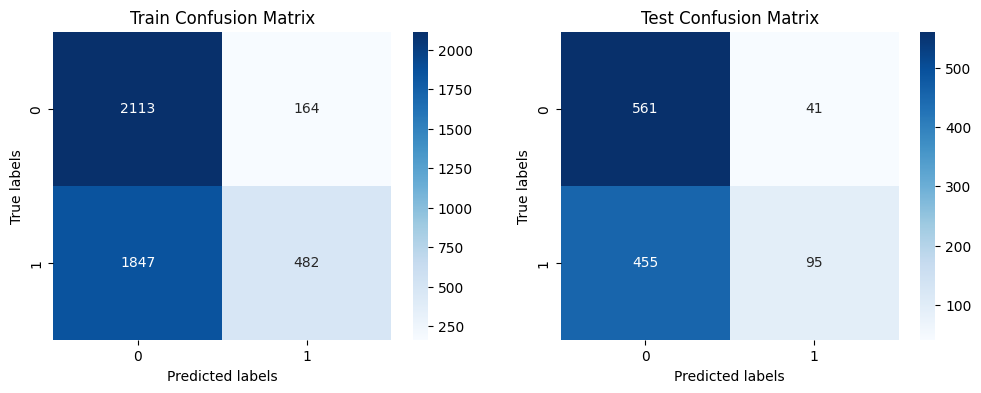

In [90]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_nb_pred, y_test_nb_pred)
     

**2. Cross- Validation & Hyperparameter Tuning**

In [91]:
# ML Model - 6  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
# create an instance of the Gaussian Naive Bayes classifier
nb = GaussianNB()
# set up the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
# perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# create a new instance of the classifier using the best hyperparameters
nb_best = GaussianNB(**best_params)
# evaluate the classifier using cross-validation
scores = cross_val_score(nb_best, x_train, y_train, cv=5)
# print the cross-validation scores
print('Cross-validation scores:', scores)
# train the classifier on the entire training set using the best hyperparameters
nb_best.fit(x_train, y_train)
# make predictions on the training and test sets
y_train_nb_pred_gs = nb_best.predict(x_train)
y_test_nb_pred_gs = nb_best.predict(x_test)
y_score_nb_pred_gs = nb_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'var_smoothing': 1e-09}
Cross-validation scores: [0.55856833 0.55917481 0.55157438 0.56243214 0.58631922]


Train Accuracy      0.5634
Test Accuracy       0.5694
Train Precision     0.7461
Test Precision      0.6985
Train Recall        0.2070
Test Recall         0.1727
Train ROC AUC       0.5675
Test ROC AUC        0.5523
--------------------------------------------------


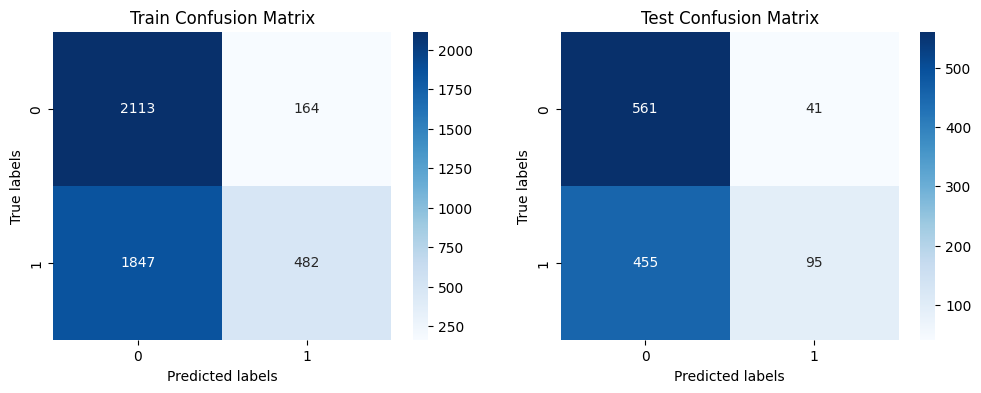

In [92]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_nb_pred_gs, y_test_nb_pred_gs)

**Which hyperparameter optimization technique have you used and why?**

* We utilized GridSearchCV to fine-tune the hyperparameters of our machine learning model and improve its performance. GridSearchCV exhaustively searched through all possible combinations of hyperparameters to identify the best values for maximizing model performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here Predicting TenYearCHD considered as classification problem, where the goal is to predict a outcome variable (TenYearChd) based on one or more predictor variables.

**Accuracy:** Accuracy is a commonly used metric to evaluate the performance of a classification model. It measures the percentage of correctly classified instances among all instances. A higher accuracy score indicates a better performance of the model in predicting the correct class for each instance.

**Precision:** Precision is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positives by the sum of true positives and false positives. A higher precision score indicates that the model has a lower rate of false positives, which is important in applications where false positives have a high cost.

**Recall:** Recall, also known as sensitivity or true positive rate, is a metric that measures the proportion of true positive predictions among all instances that actually belong to the positive class. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher recall score indicates that the model has a lower rate of false negatives, which is important in applications where false negatives have a high cost.

**AUC ROC:** The Area Under the Receiver Operating Characteristic Curve (AUC ROC) is a metric used to evaluate the performance of binary classification models. It measures the model's ability to distinguish between positive and negative classes at different probability thresholds. The AUC ROC score ranges between 0 and 1, with a score of 0.5 indicating a random model and a score of 1 indicating a perfect model. A higher AUC ROC score indicates a better performance of the model in distinguishing between positive and negative classes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

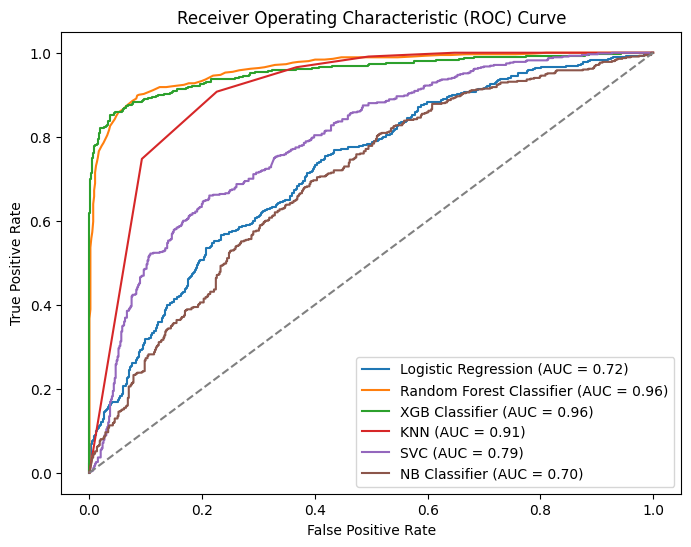

In [93]:
# define the classifiers
classifiers = [ ("Logistic Regression", LogisticRegression()),
                ("Random Forest Classifier", RandomForestClassifier()),
                ("XGB Classifier", XGBClassifier()),
                ("KNN", KNeighborsClassifier()),
                ("SVC", SVC(probability=True)),
                ("NB Classifier", GaussianNB())]

# iterate through classifiers and plot ROC curves
plt.figure(figsize=(8, 6))
for name, classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

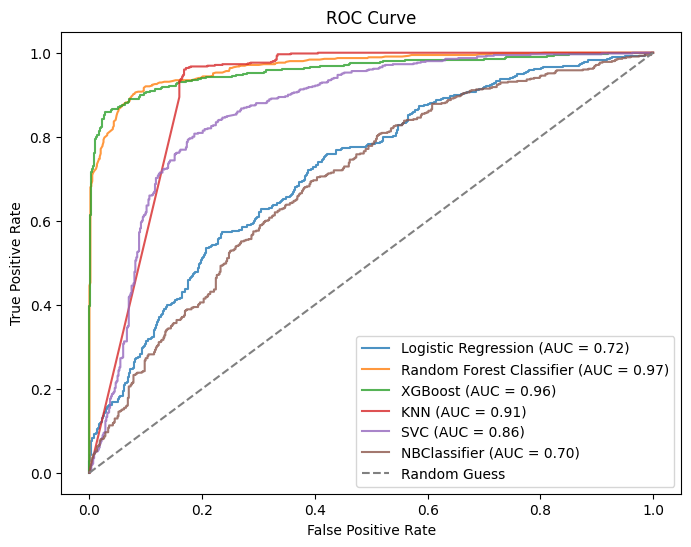

In [94]:
# after cross validation and hyperparameter tuning
Model = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC","NBClassifier"]
Y_SCORE = [y_score_logistic_pred_cv, y_score_rf_pred_gs, y_score_xgb_pred_gs, 
           y_score_knn_pred_gs, y_score_svc_pred_gs,y_score_nb_pred_gs]

# Create dataframe from the lists
data = {'MODEL': Model, 'Y_SCORE': Y_SCORE}
Metric_df = pd.DataFrame(data)

# plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for i, row in Metric_df.iterrows():
    fpr, tpr, _ = roc_curve(y_test, row['Y_SCORE'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{row['MODEL']} (AUC = {roc_auc:.2f})", alpha=0.8)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
# Storing metrics in order to make dataframe of metrics 
# (after cross validation and hyperparameter tuning)
Model          = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC", "NBClassifier"]
Test_Accuracy  = [0.6571,0.9036,0.9019,0.8194,0.7899,0.5694]
Test_Precision = [0.6273,0.8791,0.8951,0.7317,0.7369,0.6985]
Test_Recall    = [0.6945,0.9255,0.9000,0.9818,0.8709,0.1727]
Test_ROC_AUC   = [0.6587,0.9046,0.9018,0.8265,0.7934,0.5523]
# Create dataframe from the lists
data = {'Model' : Model,
        'Test_Accuracy'  : Test_Accuracy,
        'Test_Precision' : Test_Precision,
        'Test_Recall'    : Test_Recall,
        'Test_ROC_AUC'   : Test_ROC_AUC}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df   

Model  Test_Accuracy  Test_Precision  Test_Recall  \
0       Logistic Regression         0.6571          0.6273       0.6945   
1  Random Forest Classifier         0.9036          0.8791       0.9255   
2                   XGBoost         0.9019          0.8951       0.9000   
3                       KNN         0.8194          0.7317       0.9818   
4                       SVC         0.7899          0.7369       0.8709   
5              NBClassifier         0.5694          0.6985       0.1727   

   Test_ROC_AUC  
0        0.6587  
1        0.9046  
2        0.9018  
3        0.8265  
4        0.7934  
5        0.5523

Based on the results of the different models tested on the cardiovascular risk prediction project, it appears that the Random Forest Classifier and XGBoost models are the best options to use for the final prediction model. Both models have high accuracy scores of 0.9036 and 0.9019 respectively, which is essential for use in real-time prediction systems. Additionally, the precision and recall scores of these models are also high, indicating that they are good at correctly predicting positive and negative cases.

While the KNN model had a relatively high recall score, its accuracy and precision scores were lower than those of the Random Forest Classifier and XGBoost models. Similarly, the SVC model had a lower accuracy and ROC AUC score, indicating that it may not be as suitable for this particular classification problem

However, the 	Random Forest Classifier model has slightly higher test accuracy than the XGBoost, indicating that it may be a better choice for predicting cardiovascular risk.

Additionally, the 	Random Forest Classifier model also has a higher ROC AUC score, suggesting that it has a better ability to distinguish between positive and negative cases. Therefore, based on the results presented, the 	Random Forest Classifier model may be the better choice for predicting cardiovascular risk in this project.

**So, I am choosing Random Forest Classifier model as best fit classification model for Cardiovascular Risk Prediction dataset.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Although tree-based algorithms can be less interpretable, interpretability can be improved using tools like LIME and SHAP.

Model interpretability can be approached globally and locally.

* Global interpretability refers to understanding the overall relationship between features and prediction results. eg. Linear regression
* Local interpretability focuses on understanding the individual impact of each feature on a specific prediction. e.g. SHAP and LIME

Text(0.5, 0, 'Relative Importance')

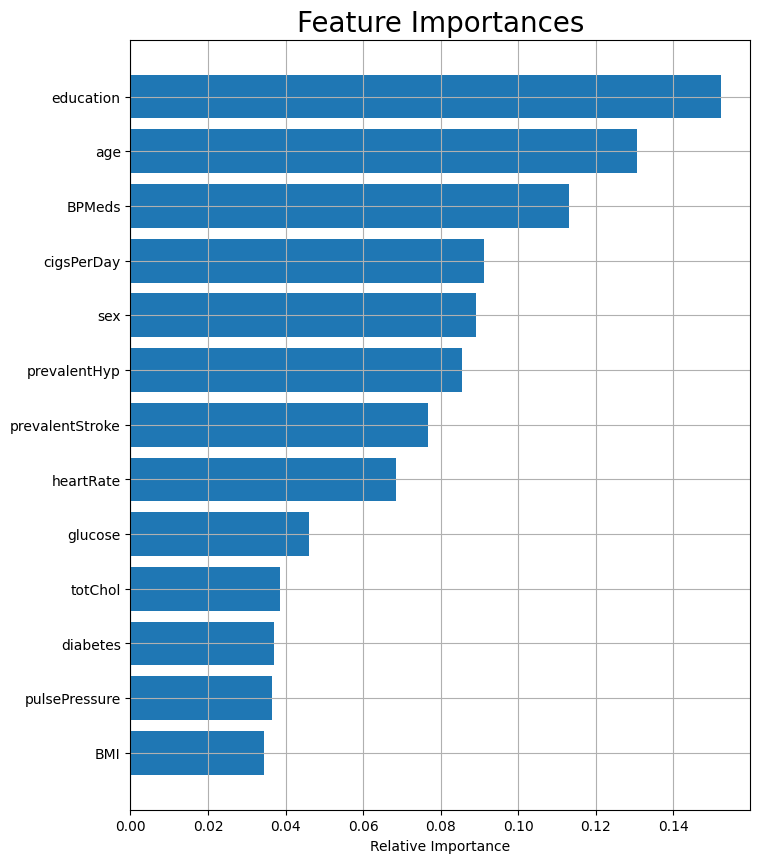

In [100]:
# Plotting the barplot to determine which feature is contributing the most
features = final_df.columns
importances = best_estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [80]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***